<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Adv%20Spvsd%20Algo%20-%20Time%20Series%20Forecast%20%26%20RecSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

# **Time Series Analysis**

https://otexts.com/fpp2/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 6)

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 34.5MB/s]


In [ ]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head()

DATE   Sales
0 2001-01-01  6519.0
1 2001-02-01  6654.0
2 2001-03-01  7332.0
3 2001-04-01  7332.0
4 2001-05-01  8240.0

In [ ]:
mobile_sales.shape

(217, 2)

In [ ]:
mobile_sales.describe(include = "all")

<ipython-input-6-3e7a40ea080d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mobile_sales.describe(include = "all")


DATE         Sales
count                   217    198.000000
unique                  217           NaN
top     2001-01-01 00:00:00           NaN
freq                      1           NaN
first   2001-01-01 00:00:00           NaN
last    2019-01-01 00:00:00           NaN
mean                    NaN  10842.757576
std                     NaN   2605.006293
min                     NaN    108.000000
25%                     NaN   8856.000000
50%                     NaN  10745.000000
75%                     NaN  12399.750000
max                     NaN  23740.000000

In [ ]:
mobile_sales.dtypes

DATE     datetime64[ns]
Sales           float64
dtype: object

In [ ]:
mobile_sales.set_index('DATE', inplace=True)

In [ ]:
mobile_sales.head()

Sales
DATE              
2001-01-01  6519.0
2001-02-01  6654.0
2001-03-01  7332.0
2001-04-01  7332.0
2001-05-01  8240.0

<Axes: xlabel='DATE'>

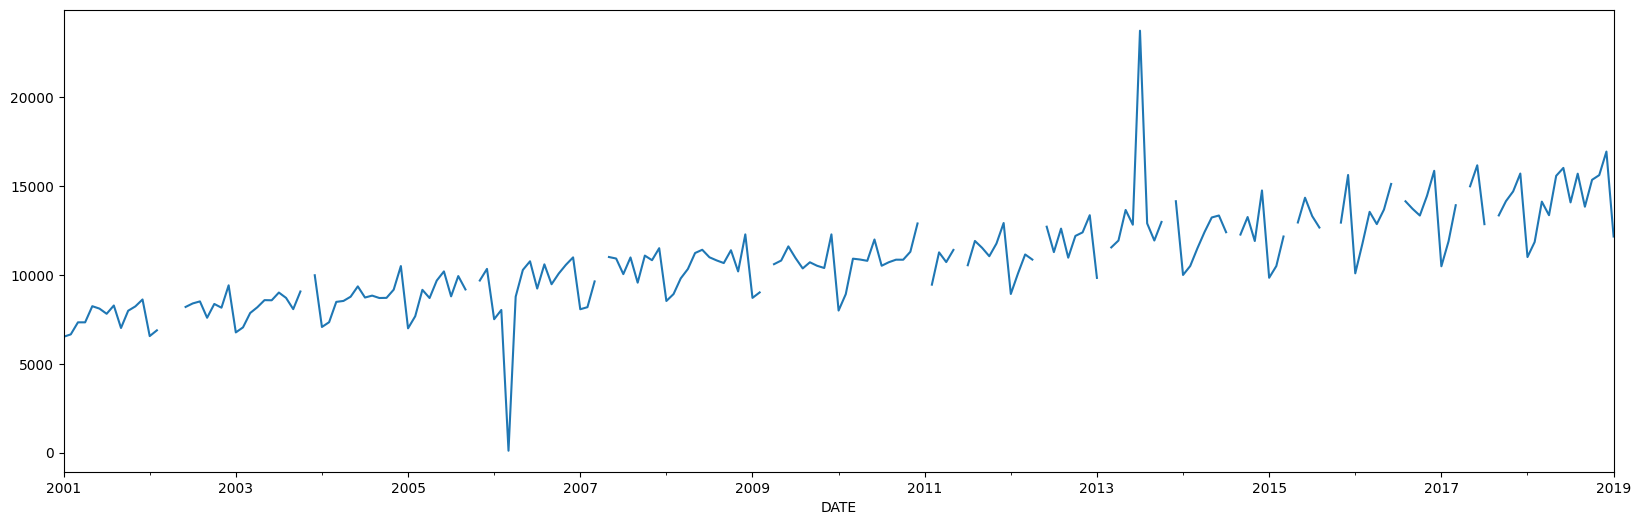

In [ ]:
mobile_sales['Sales'].plot()

In [ ]:
mobile_sales.isna().sum()

Sales    19
dtype: int64

## Treating Missing Values

In [ ]:
mobile_sales['Sales'].mean()
10842.757575757576

### Mean Imputation - NG

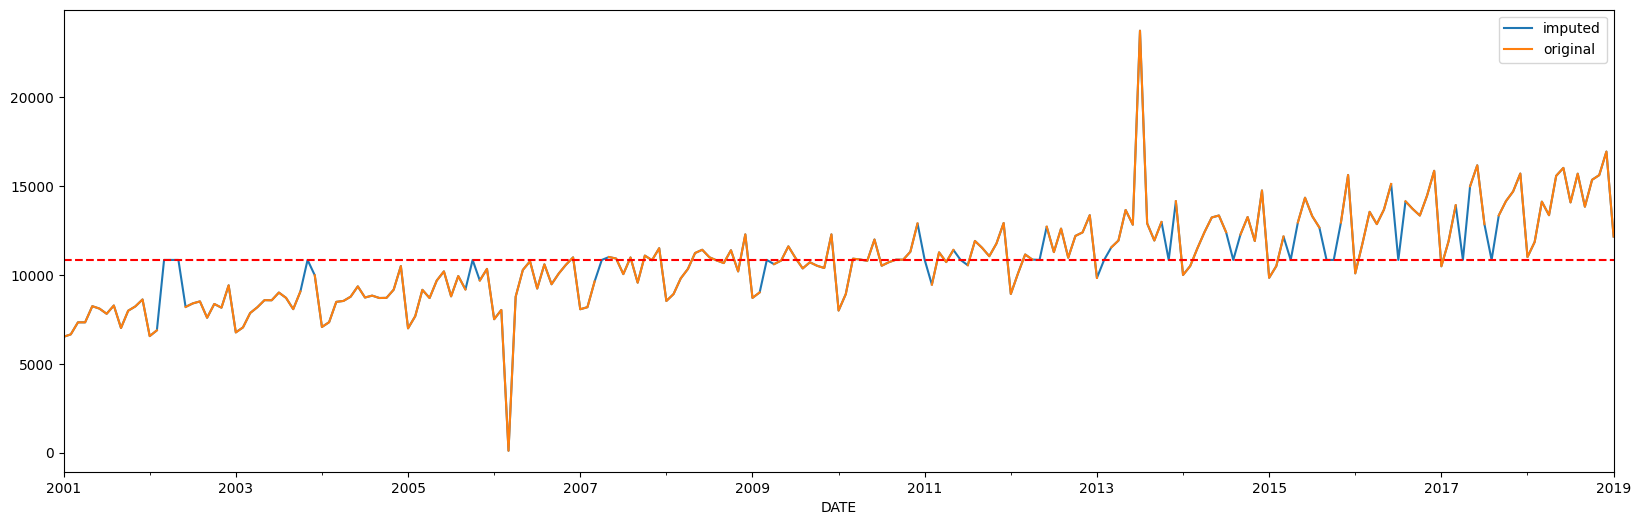

In [ ]:
mobile_sales.Sales.fillna( mobile_sales.Sales.mean() ).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.axhline(y = mobile_sales['Sales'].mean(), color = 'r', linestyle = '--')
plt.legend()

### Forward Fill - OK

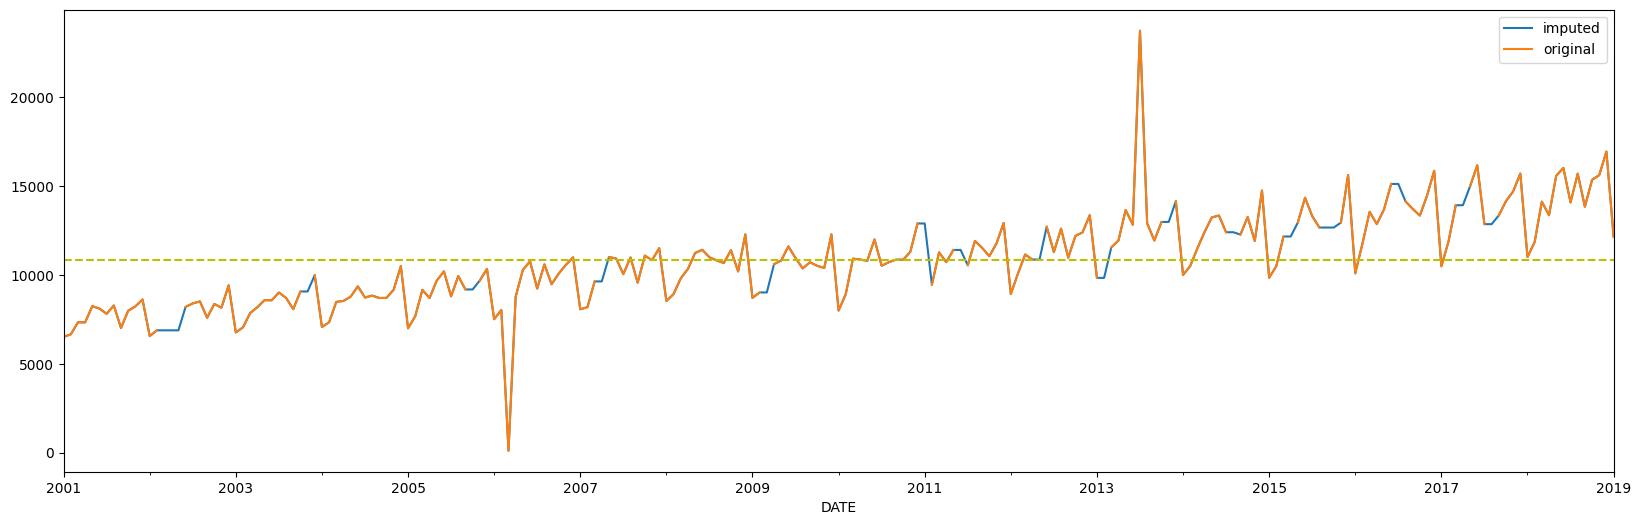

In [ ]:
mobile_sales.Sales.fillna( method='ffill').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.axhline(y = mobile_sales['Sales'].mean(), color = 'y', linestyle = '--')
plt.legend()

### Linear Interpolation - OK

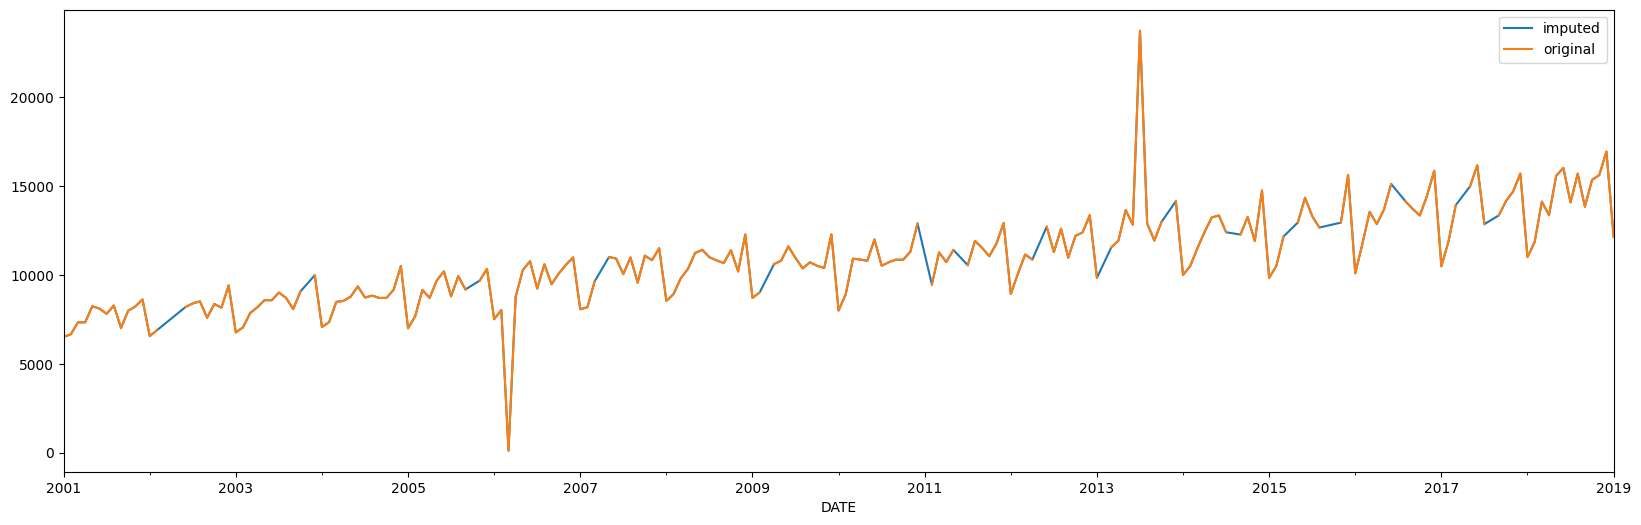

In [ ]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

In [ ]:
mobile_sales['Sales'] = mobile_sales.Sales.interpolate(method='linear')

In [ ]:
mobile_sales.isna().sum()

Sales    0
dtype: int64

#### Linear Interpolation Scratch

In [ ]:
import numpy as np
import pandas as pd

i = 0
def lin_interpolate(y):

    global i
    """ Perform linear interpolation on the value of y and return the value"""

    #YOUR CODE GOES HERE
    global i
    # print(i)
    """Perform linear interpolation for x between (x1,y1) and (x2,y2) """
    if ((i)==0 or not (np.isnan(y)) or (i == df.shape[0]-1)):
      i = i+1
      return df.loc[i-1][1]

    y2 = df.iloc[i+1][1]
    x2 = i + 1
    y1 = df.iloc[i-1][1]
    x1 = i - 1
    x = i

    i = i + 1
    return round(((((y2 - y1) / (x2 - x1))* (x - x1)) + y1),2)


    #YOUR CODE ENDS HERE


df = pd.DataFrame({'x': eval(input()), 'y': eval(input())})

df['y'] = df.apply(lambda x: lin_interpolate(x["y"]), axis = 1)

print(df)

# df['y'] = df['y'].interpolate(method='linear').round(2)

## Treating Anamolies

[]

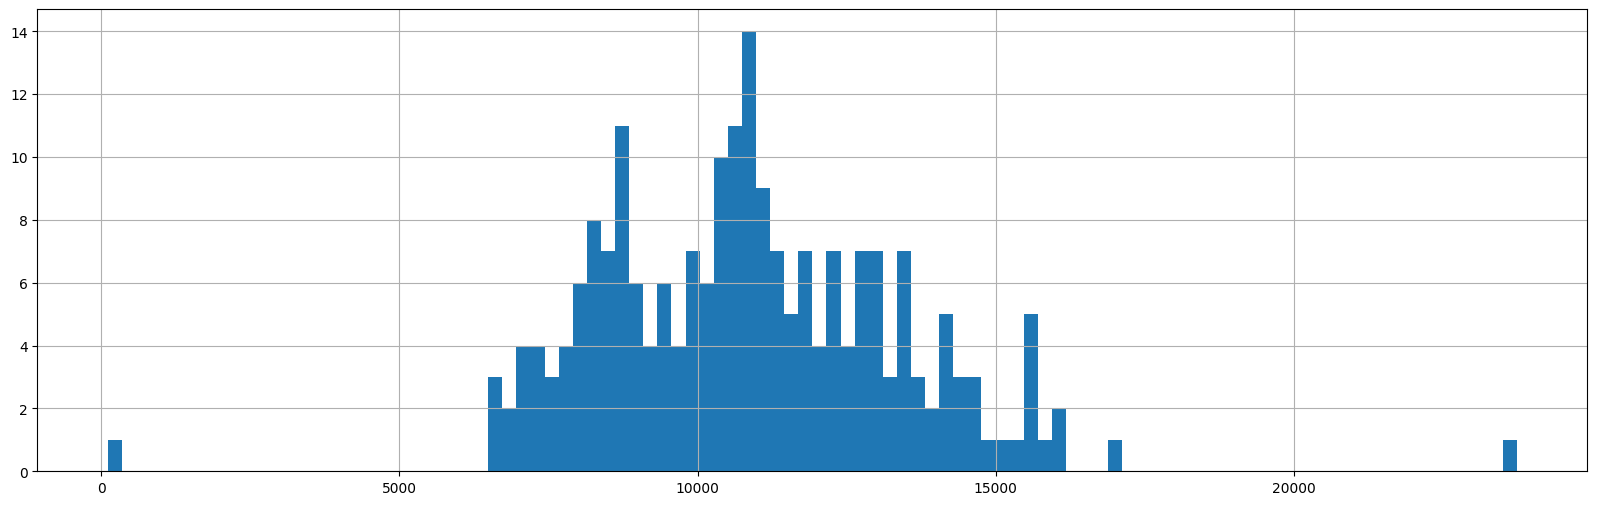

In [ ]:
mobile_sales.Sales.hist(bins = 100).plot()

### Clipping - OK

In [ ]:
mobile_sales.Sales.quantile(0.995)

16879.15999999999

In [ ]:
mobile_sales.Sales.quantile(0.005)

6522.12

[]

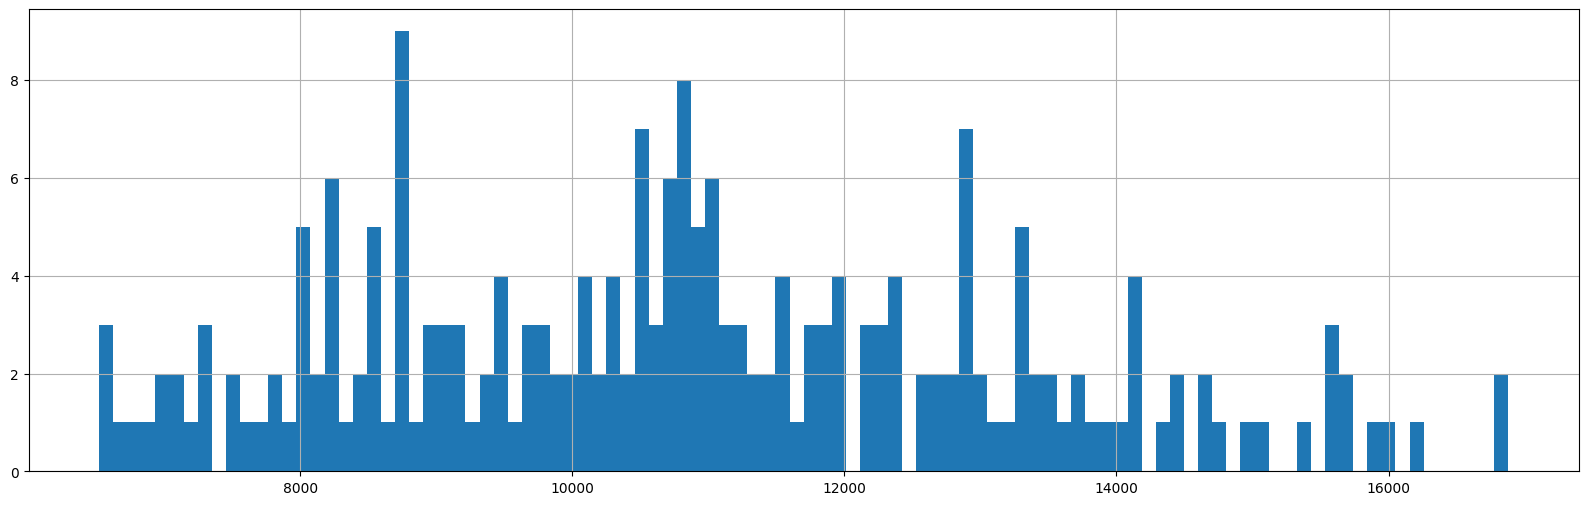

In [ ]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.995), lower=mobile_sales.Sales.quantile(0.005)).hist(bins=100).plot()

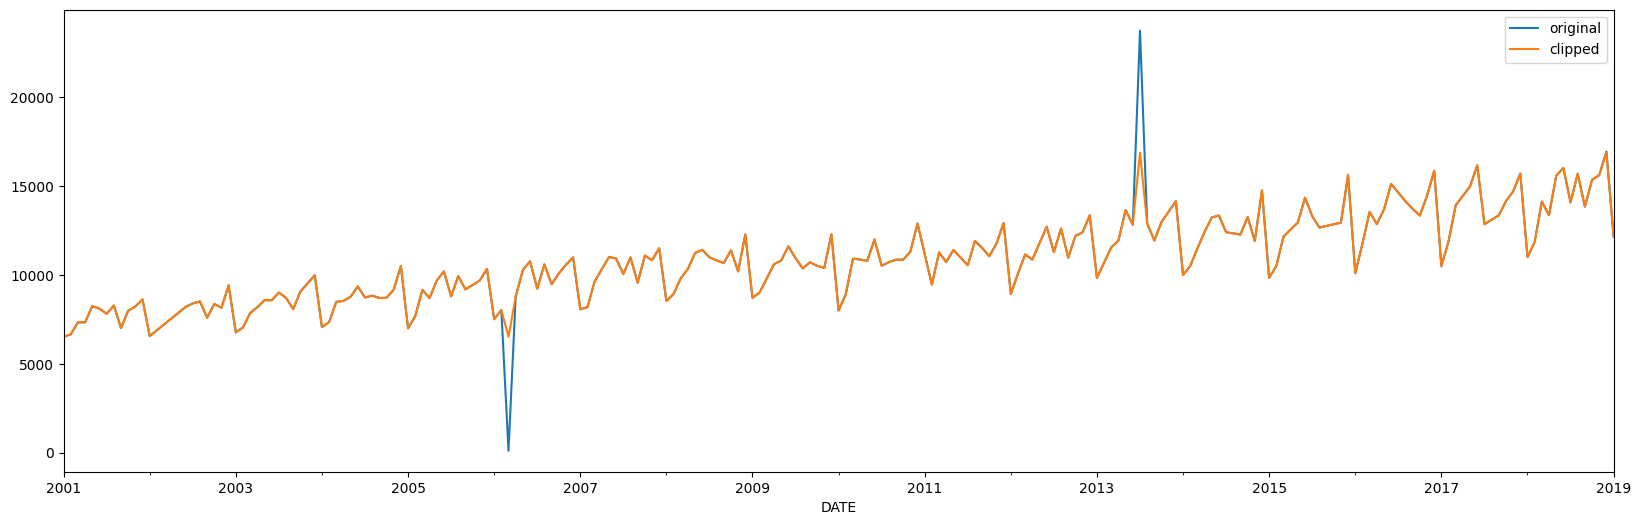

In [ ]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.995), lower=mobile_sales.Sales.quantile(0.005)).plot(label="clipped")
plt.legend()

### Rolling Window Avg - OK

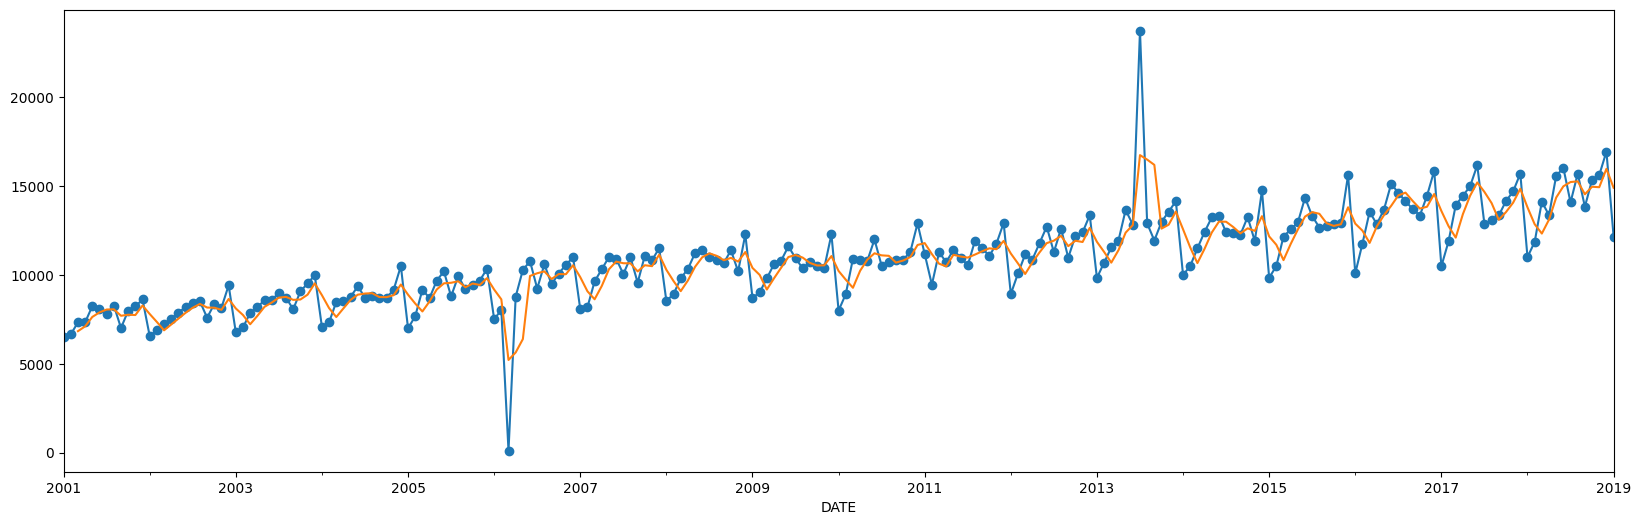

In [ ]:
mobile_sales.Sales.plot(style="-o")
mobile_sales['Sales'].rolling(window=3, center = False).mean().plot();

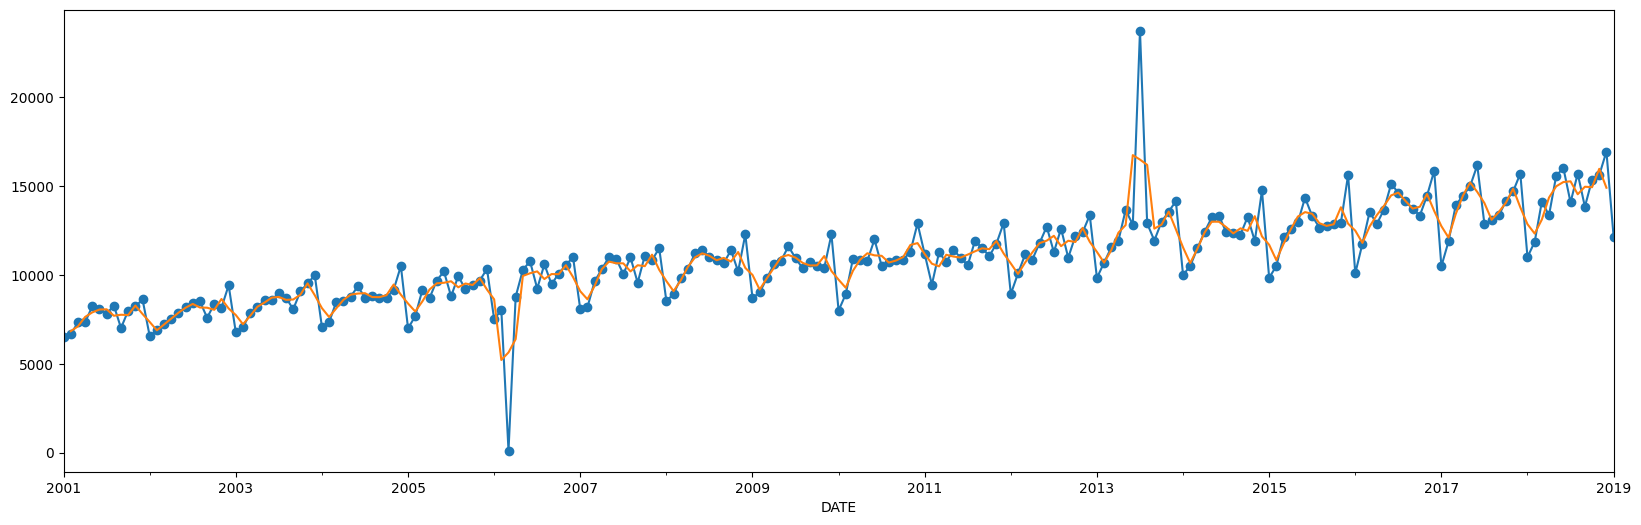

In [ ]:
mobile_sales.Sales.plot(style="-o")
mobile_sales['Sales'].rolling(window=3, center = True).mean().plot();

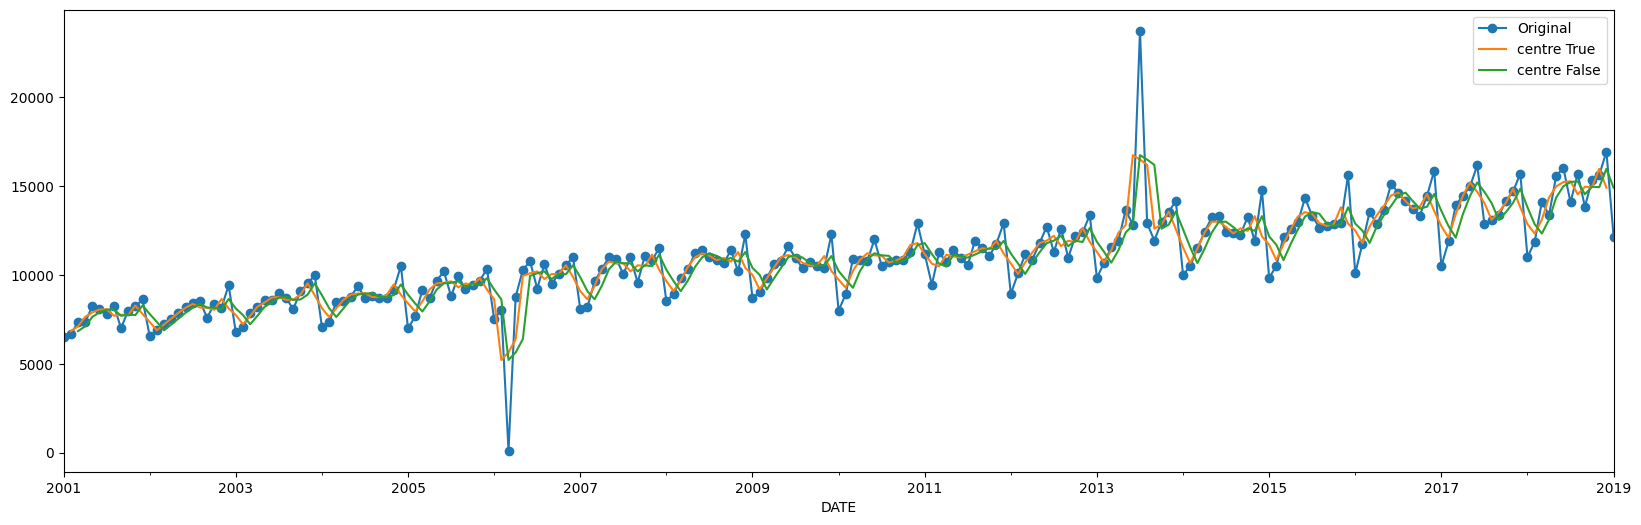

In [ ]:
mobile_sales.Sales.plot(style="-o",label="Original")
mobile_sales['Sales'].rolling(window=3, center = True).mean().plot(label = "centre True")
mobile_sales['Sales'].rolling(window=3, center = False).mean().plot(label = "centre False")
plt.legend()

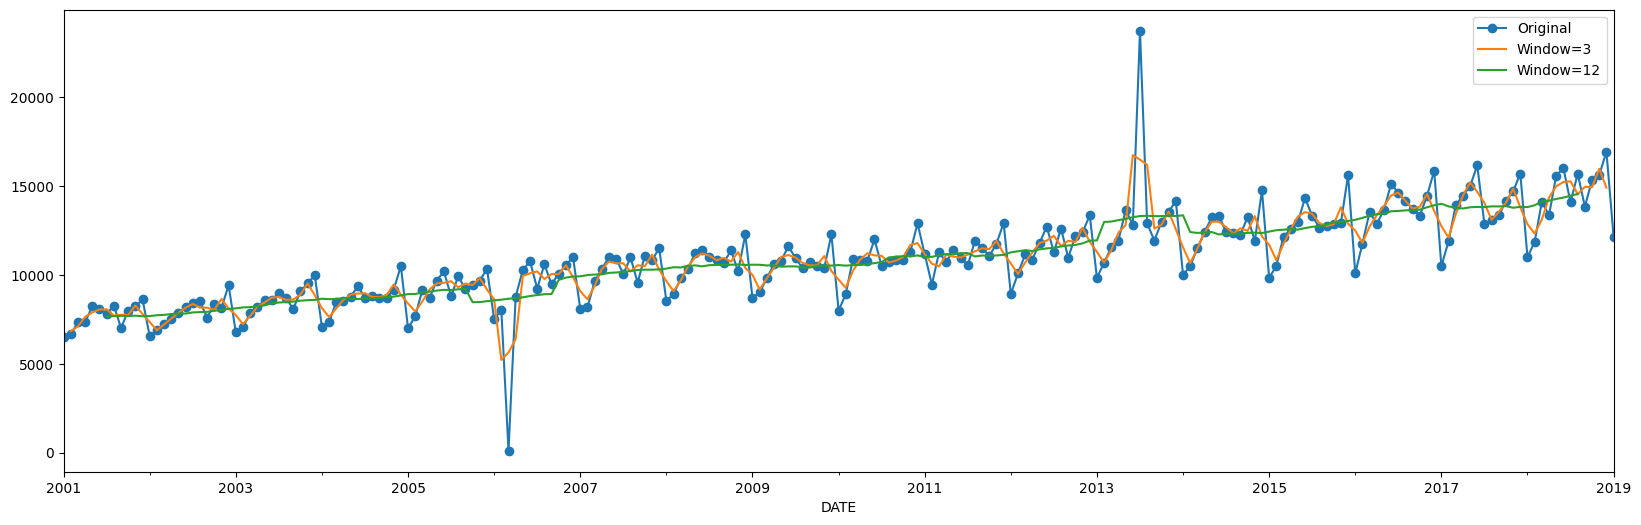

In [ ]:
mobile_sales.Sales.plot(style="-o",label="Original")
mobile_sales['Sales'].rolling(window=3, center = True).mean().plot(label = "Window=3")
mobile_sales['Sales'].rolling(window=12, center = True).mean().plot(label = "Window=12")
plt.legend()

## Decomposition

In [ ]:
mobile_sales.Sales= mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.995), lower=mobile_sales.Sales.quantile(0.005))

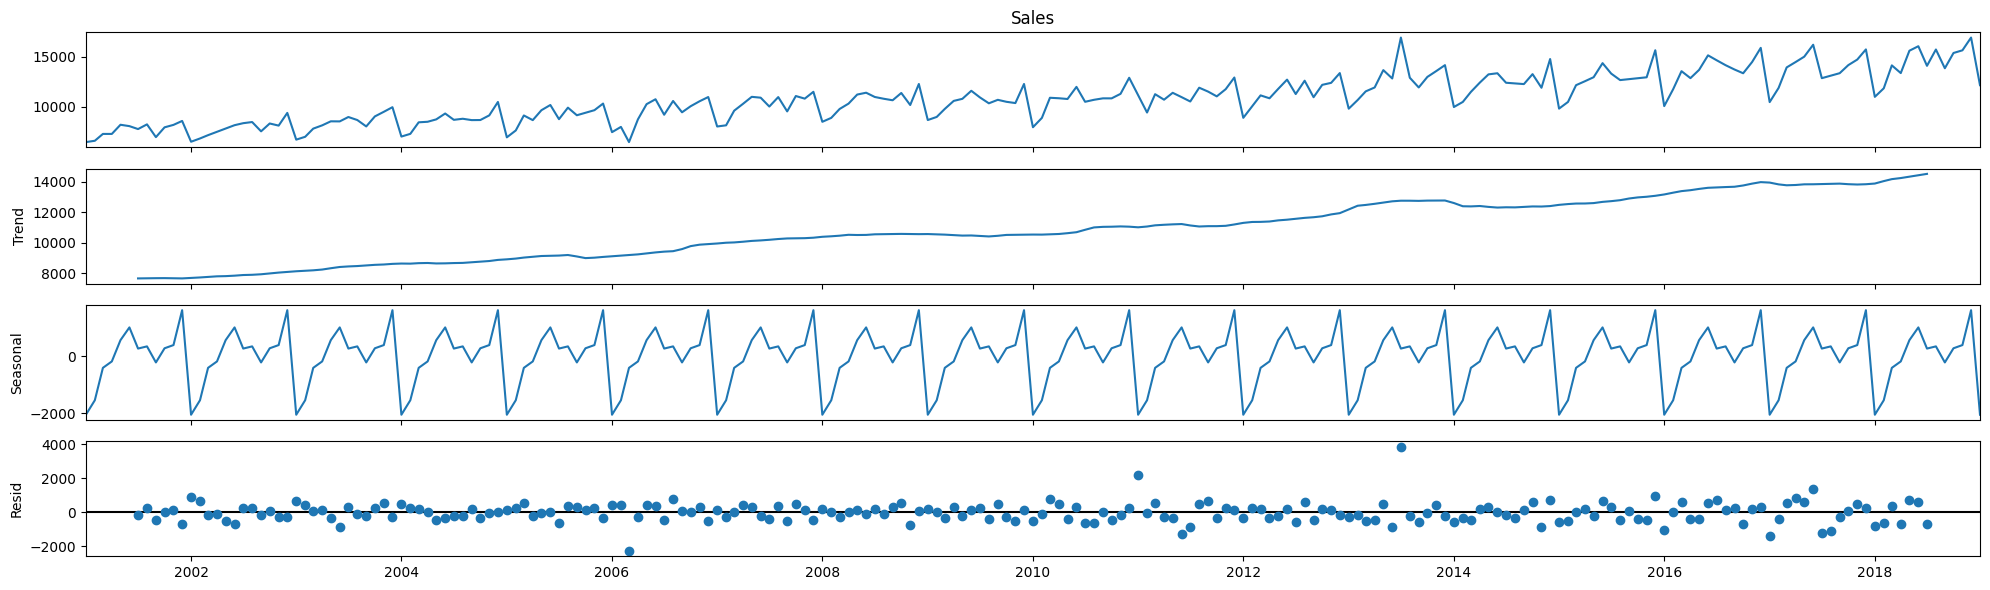

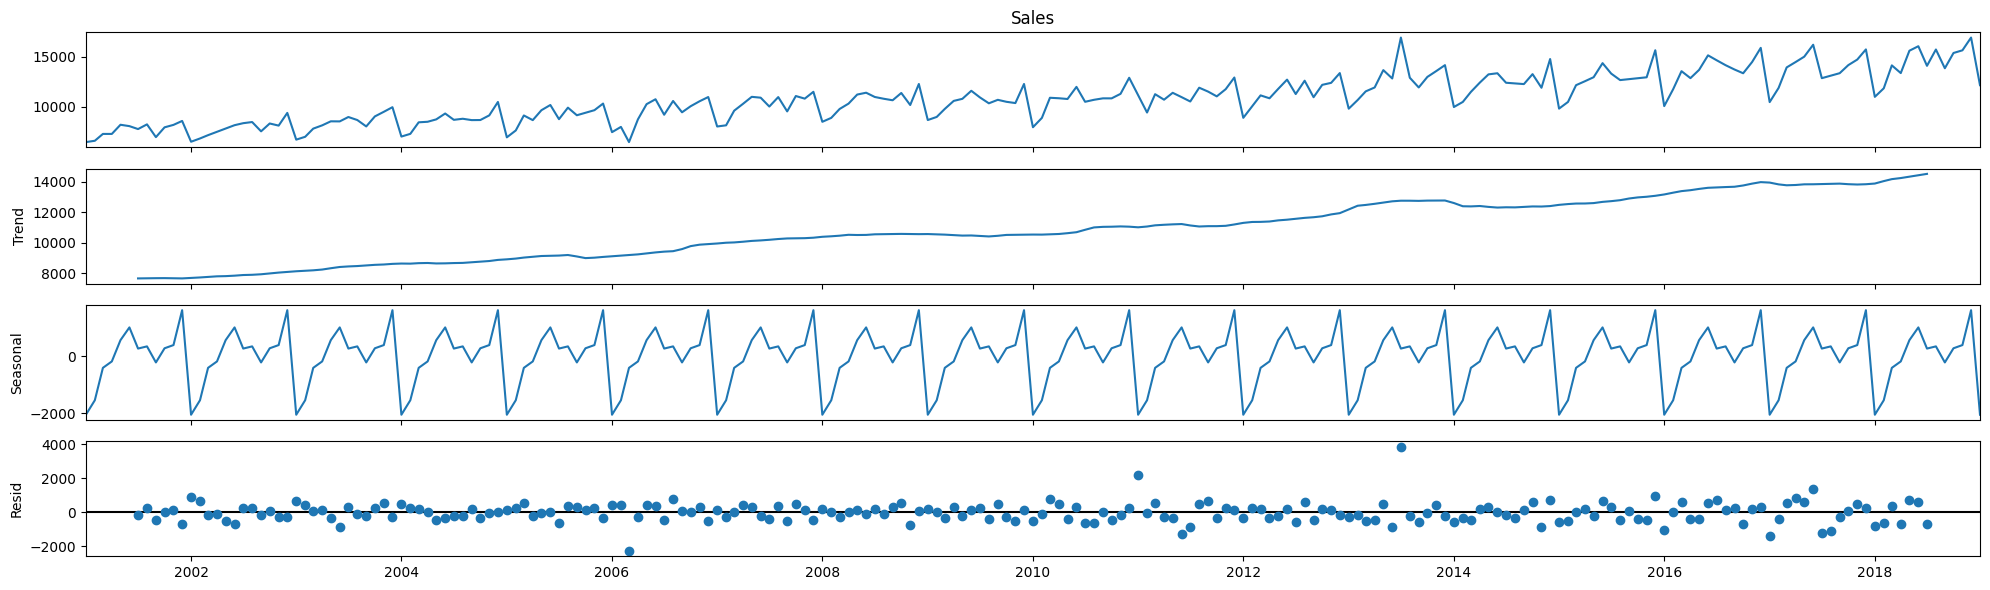

In [ ]:
# Addtive Model is used when Seasonality level is constant in each season following seasonality Pattern
import statsmodels.api as sm
model = sm.tsa.seasonal_decompose(mobile_sales['Sales'], model = 'additive')
model.plot()

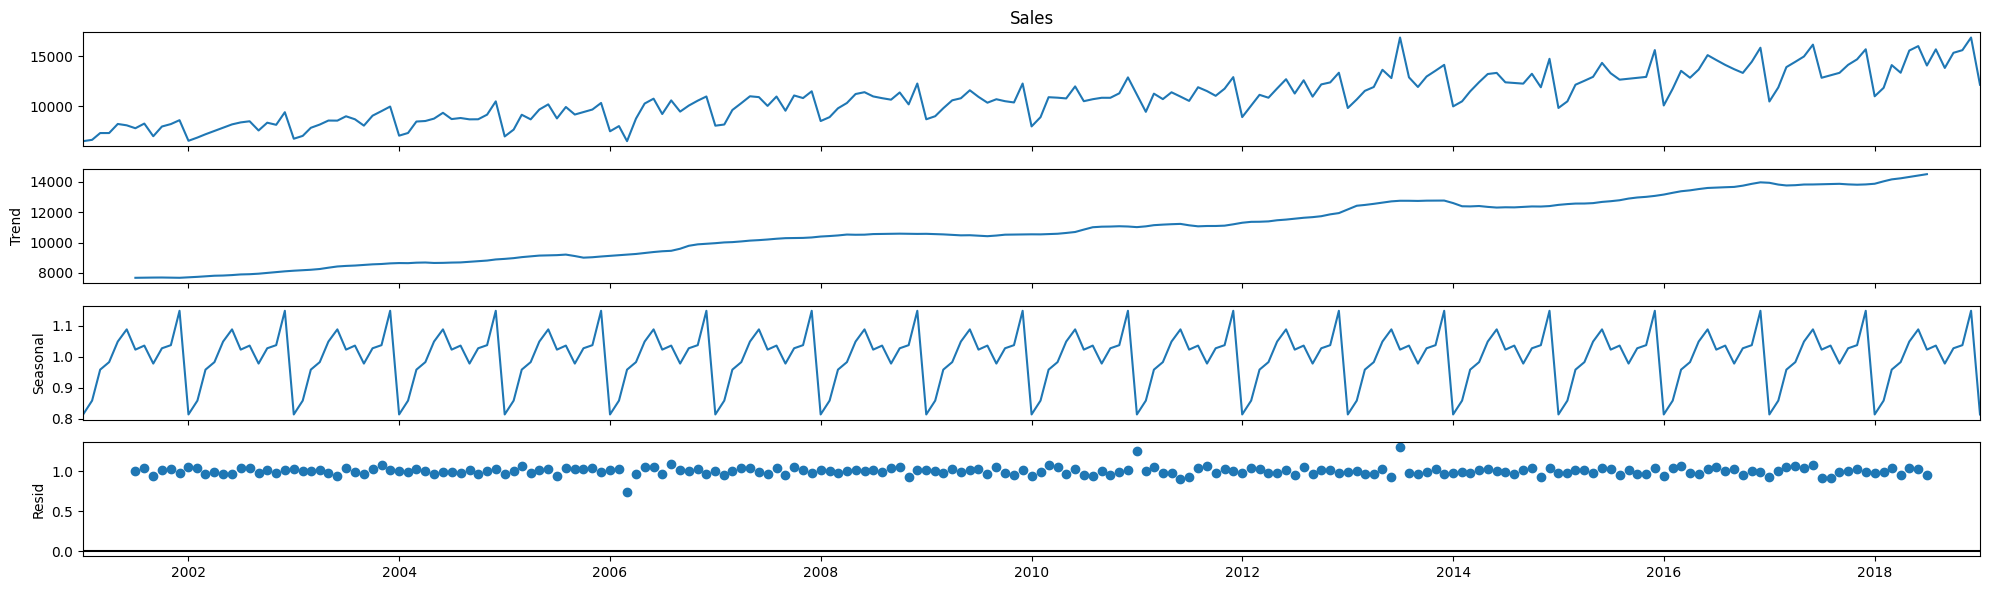

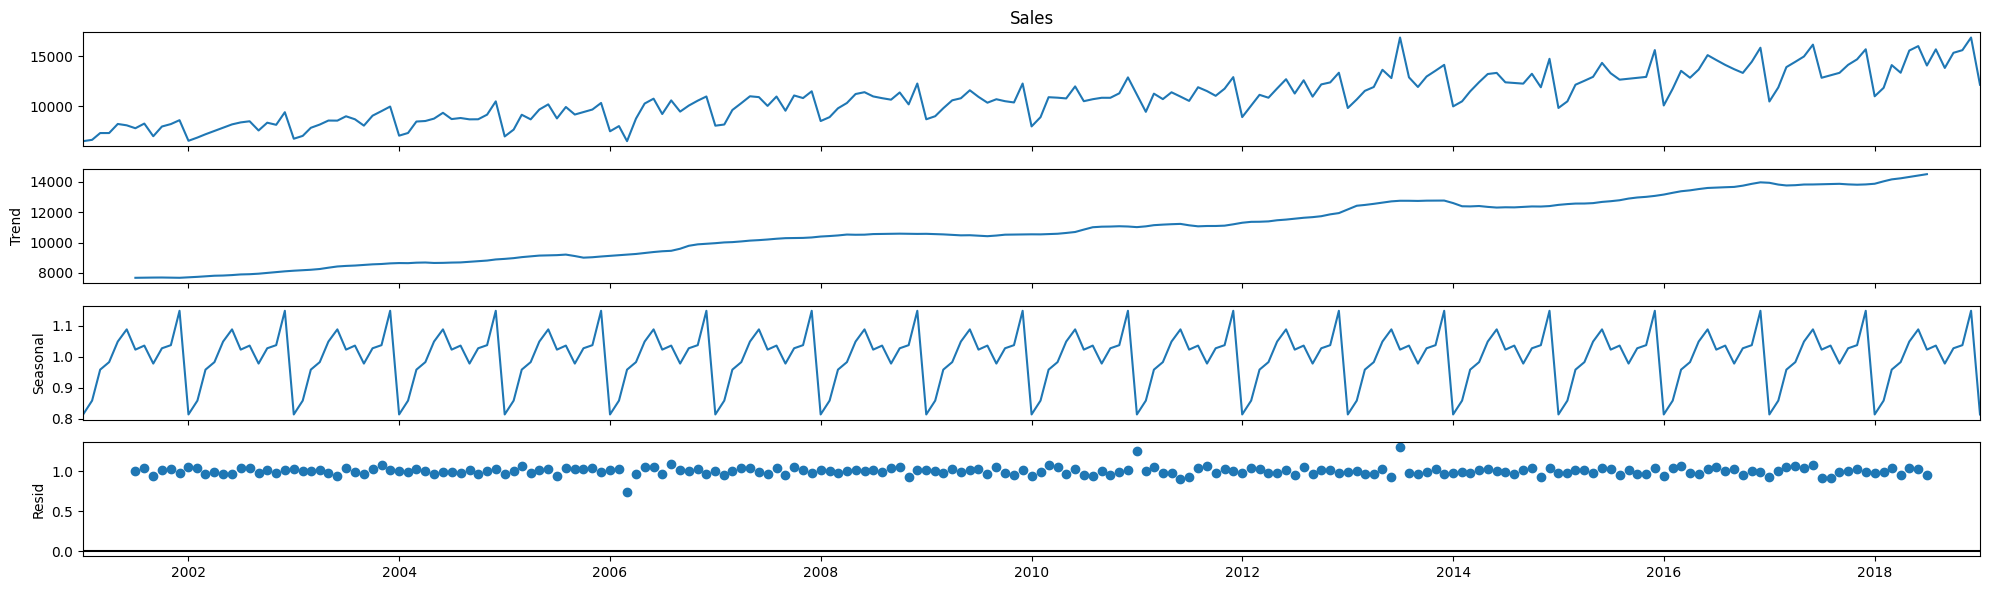

In [ ]:
# Multiplicative model is used when Seasonality is increasing its level following seasonality pattern
model = sm.tsa.seasonal_decompose(mobile_sales['Sales'], model = "multiplicative")
model.plot()

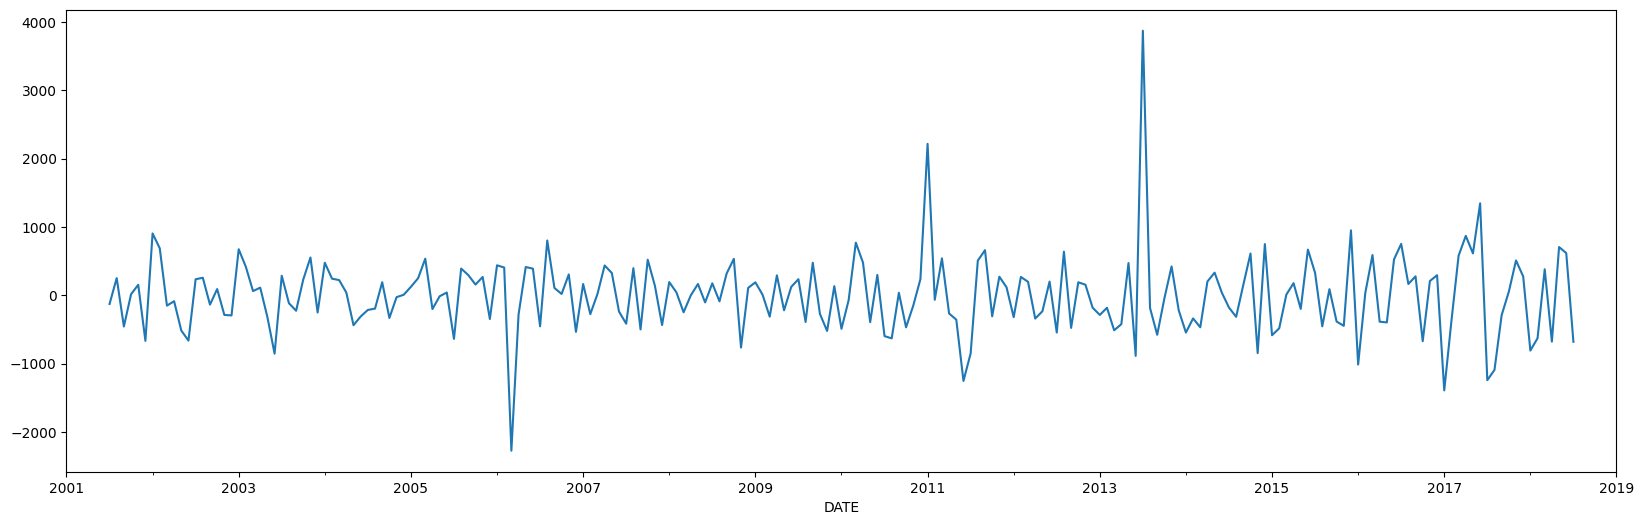

In [ ]:
model.resid.plot();

## Forecast

In [ ]:
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

test_x

Sales
DATE                
2018-02-01  11852.00
2018-03-01  14123.00
2018-04-01  13360.00
2018-05-01  15576.00
2018-06-01  16021.00
2018-07-01  14080.00
2018-08-01  15697.00
2018-09-01  13838.00
2018-10-01  15351.00
2018-11-01  15615.00
2018-12-01  16879.16
2019-01-01  12160.00

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

### Simple Forecasting

#### Mean Forecasting

In [ ]:
test_x['pred'] = train_x["Sales"].mean()

MAE : 3890.436
RMSE : 4170.094
MAPE: 0.259


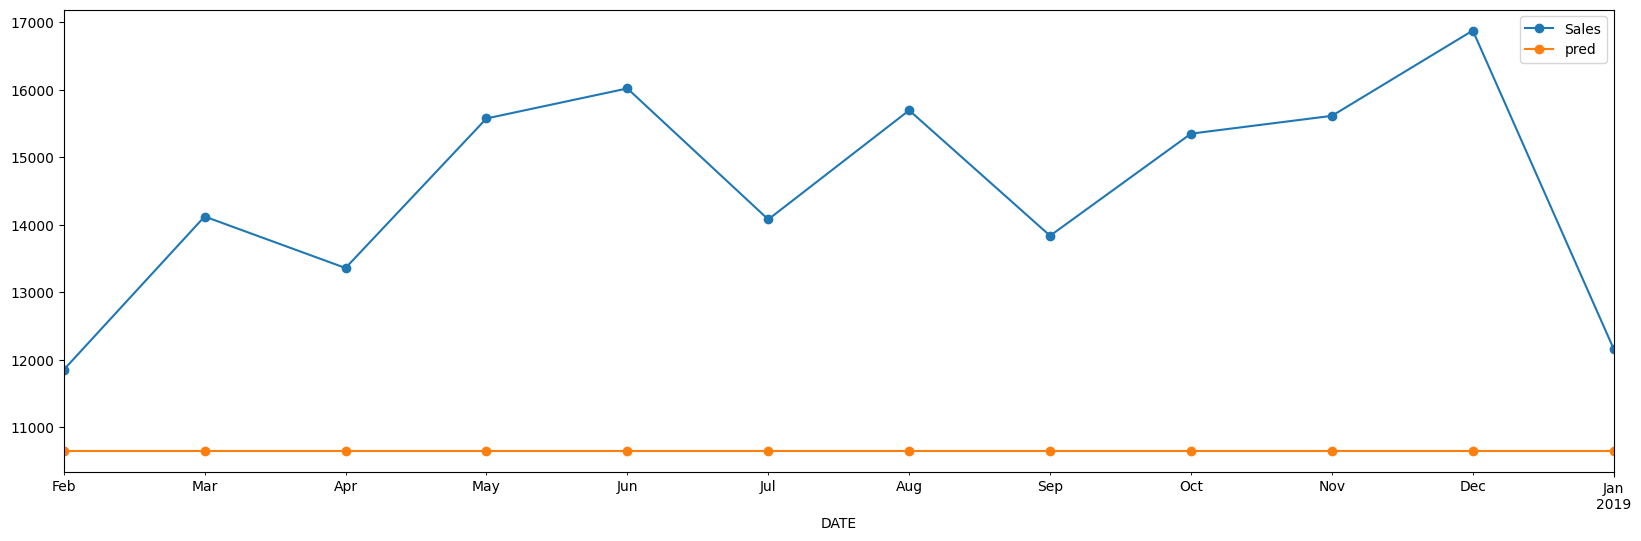

In [ ]:
test_x.plot(style= "-o")
performance(test_x['Sales'], test_x['pred'])

#### Naive Approach

In [ ]:
test_x['pred'] = train_x['Sales'][-1]

MAE : 3541.013
RMSE : 3846.163
MAPE: 0.235


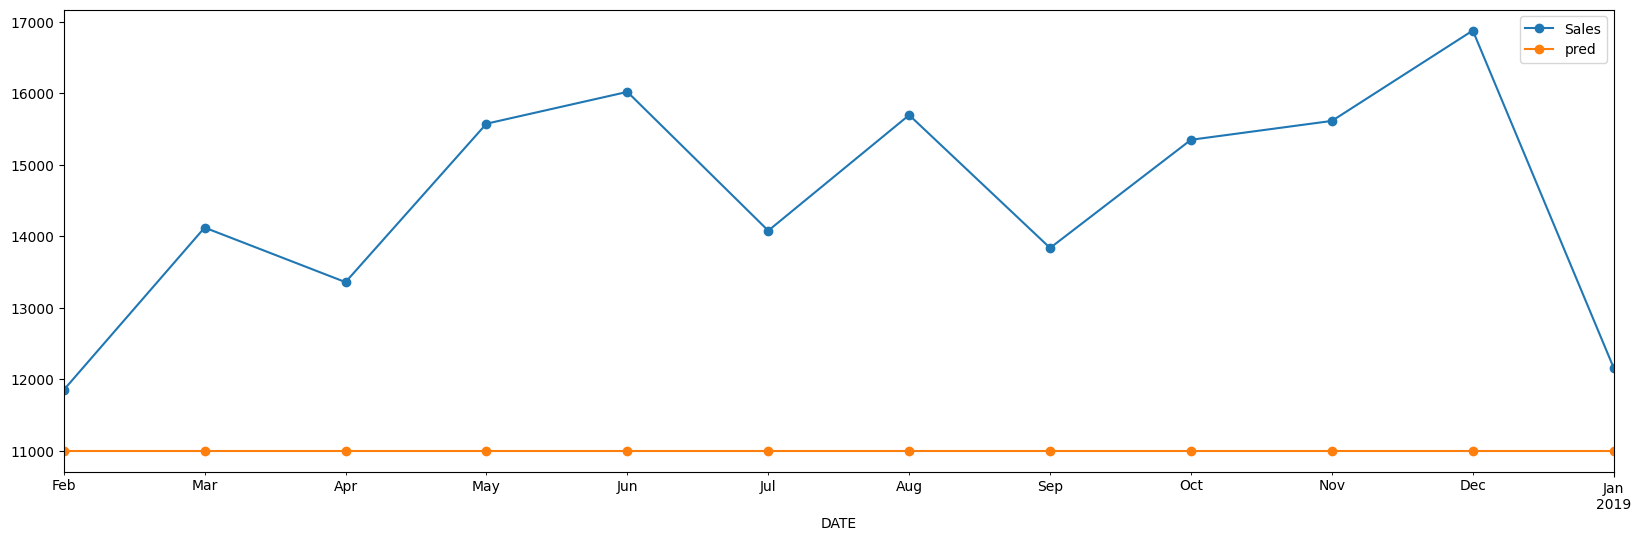

In [ ]:
test_x.plot(style= "-o")
performance(test_x['Sales'], test_x['pred'])

In [ ]:
test_x

Sales     pred
DATE                         
2018-02-01  11852.00  11005.0
2018-03-01  14123.00  11005.0
2018-04-01  13360.00  11005.0
2018-05-01  15576.00  11005.0
2018-06-01  16021.00  11005.0
2018-07-01  14080.00  11005.0
2018-08-01  15697.00  11005.0
2018-09-01  13838.00  11005.0
2018-10-01  15351.00  11005.0
2018-11-01  15615.00  11005.0
2018-12-01  16879.16  11005.0
2019-01-01  12160.00  11005.0

#### Seasonal Naive Model

MAE : 902.263
RMSE : 1120.819
MAPE: 0.061


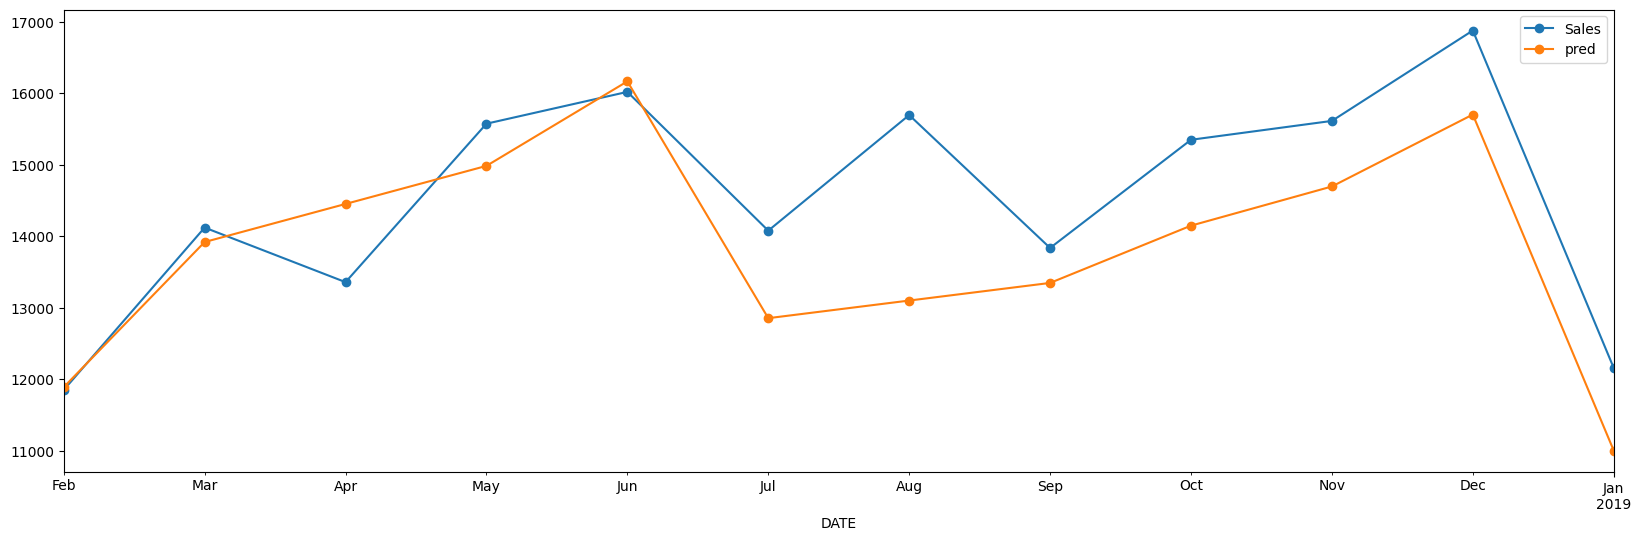

In [ ]:
for i in test_x.index:
    test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)].Sales

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

#### Drift Predictions

In [ ]:
y_t = train_x['Sales'][-1]
y_0 = train_x['Sales'][0]

m = (y_t - y_0) / len(train_x['Sales'])

h = np.arange(0, len(test_x))

In [ ]:
# np.arange(low, end , jump)
# np.linspace(low, end, how many points)

In [ ]:

test_x['pred'] = y_t + h*m


MAE : 3420.741
RMSE : 3727.232
MAPE: 0.227


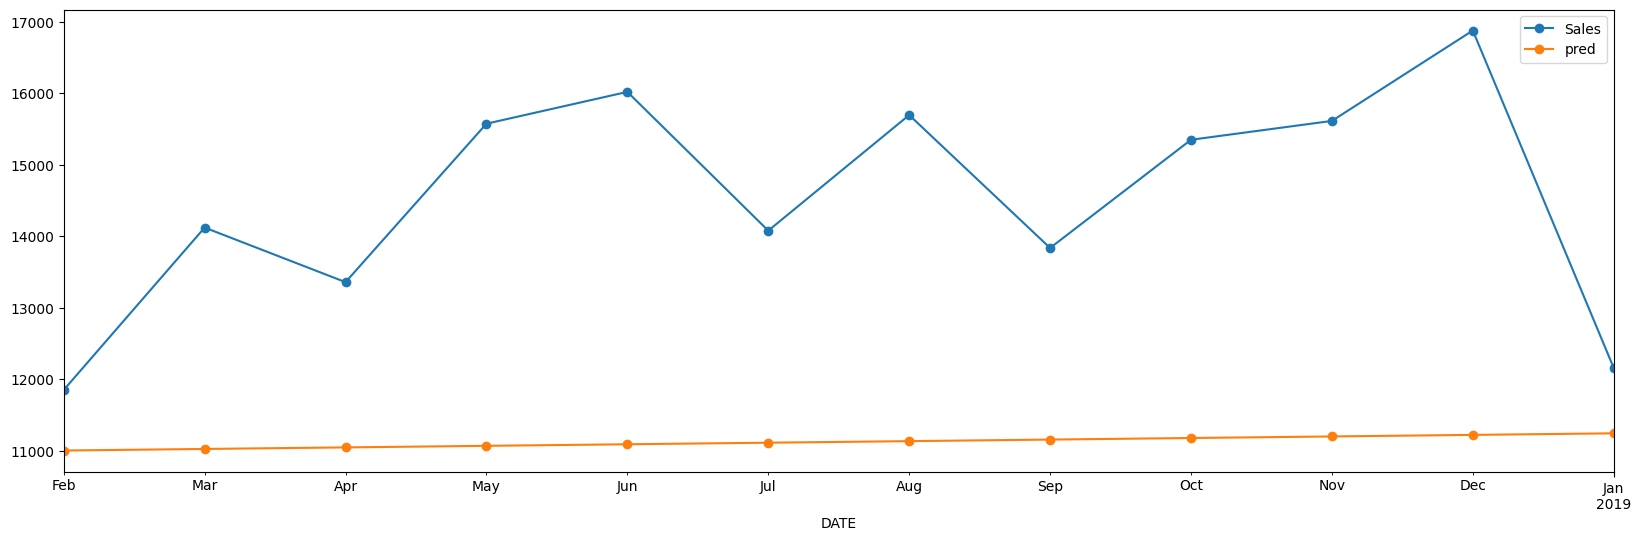

In [ ]:

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

<Axes: xlabel='DATE'>

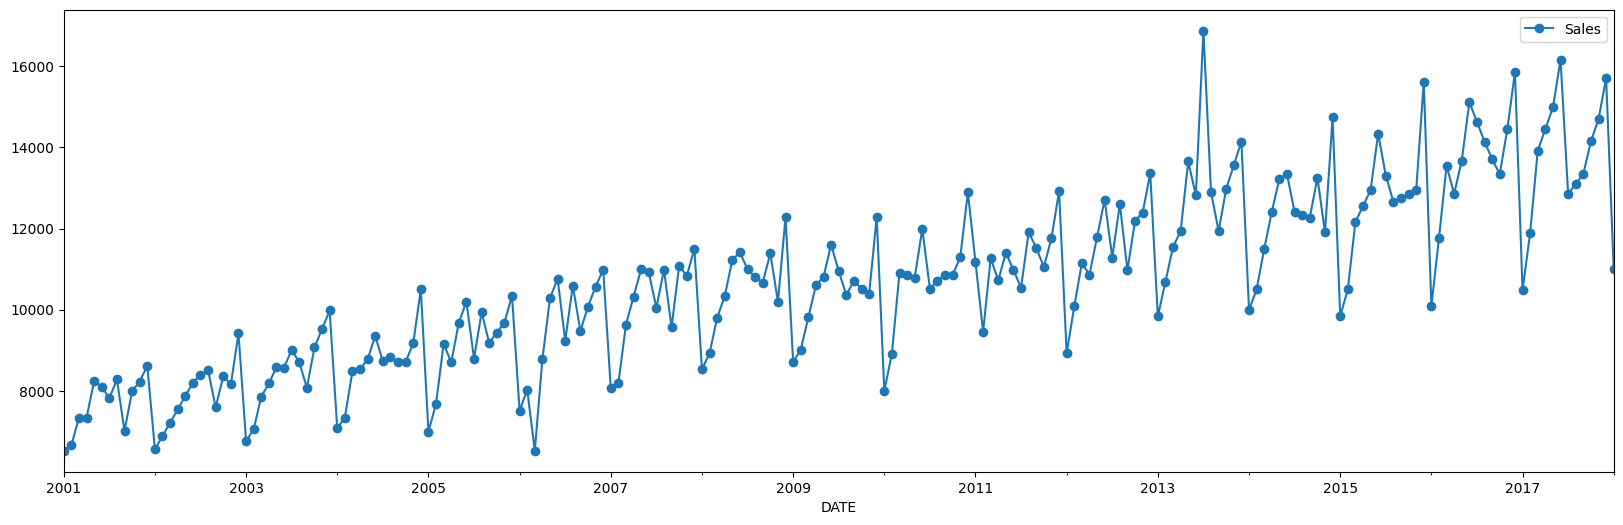

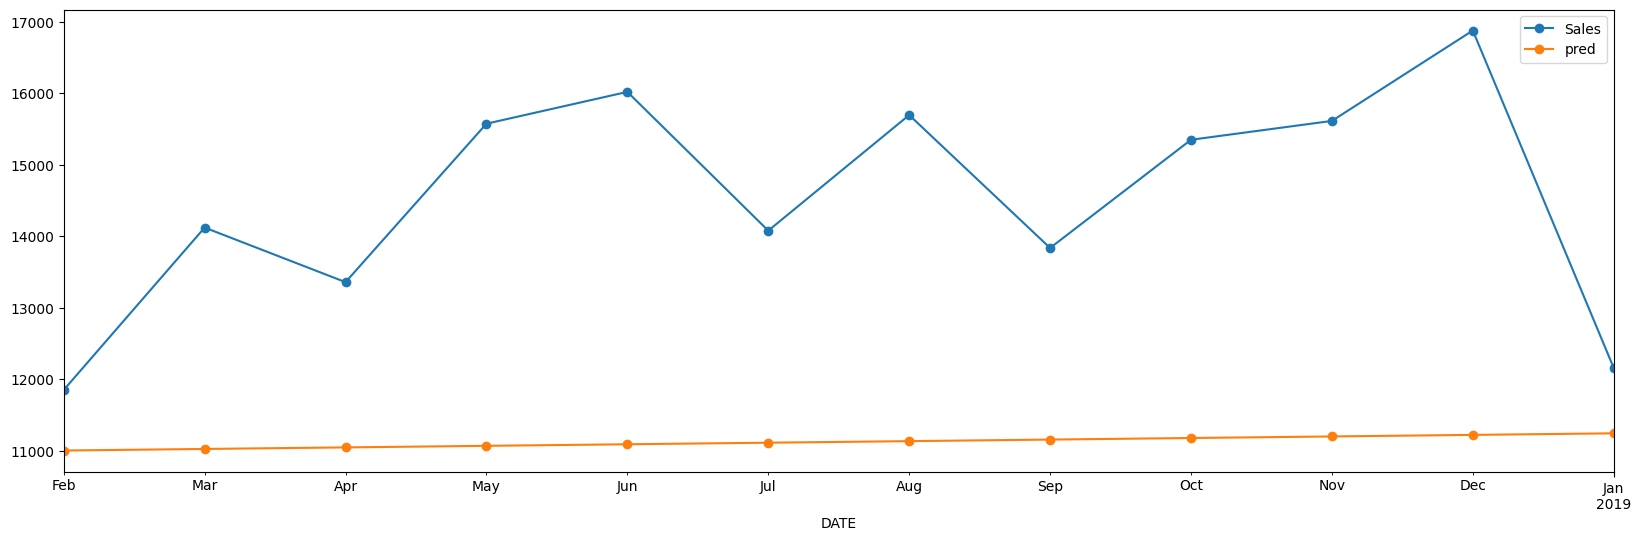

In [ ]:
train_x.plot(style='-o')
test_x.plot(style='-o')

In [ ]:
# Statement I: Naive method is capable of capturing seasonality.
# Statement II: Forecasting with mean/median value will give a flat forecast around mean/median value
# Statement III: Seasonal Naive is capable of capturing seasonality as well as trend.

### Smoothening

#### Moving Averages

In [ ]:
pred_ = train_x.Sales.dropna().copy().values

for i in range(12):
    pred_ = np.append(pred_, pred_[-3:].mean())

In [ ]:
pd.Series(pred_)

0       6522.120000
1       6654.000000
2       7332.000000
3       7332.000000
4       8240.000000
           ...     
212    13184.042219
213    13175.059036
214    13195.613236
215    13184.904830
216    13185.192368
Length: 217, dtype: float64

In [ ]:
test_x['pred'] = pred_[-12:]

MAE : 1799.247
RMSE : 2043.135
MAPE: 0.12


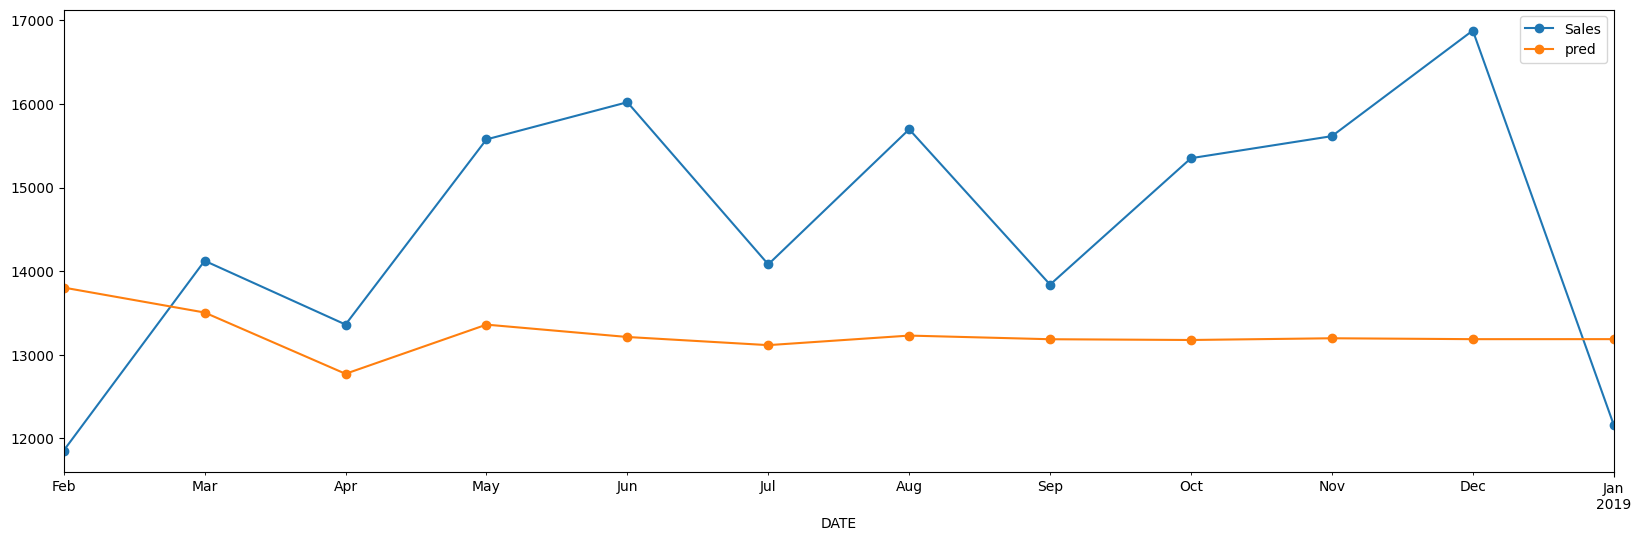

In [ ]:

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

<Axes: xlabel='DATE'>

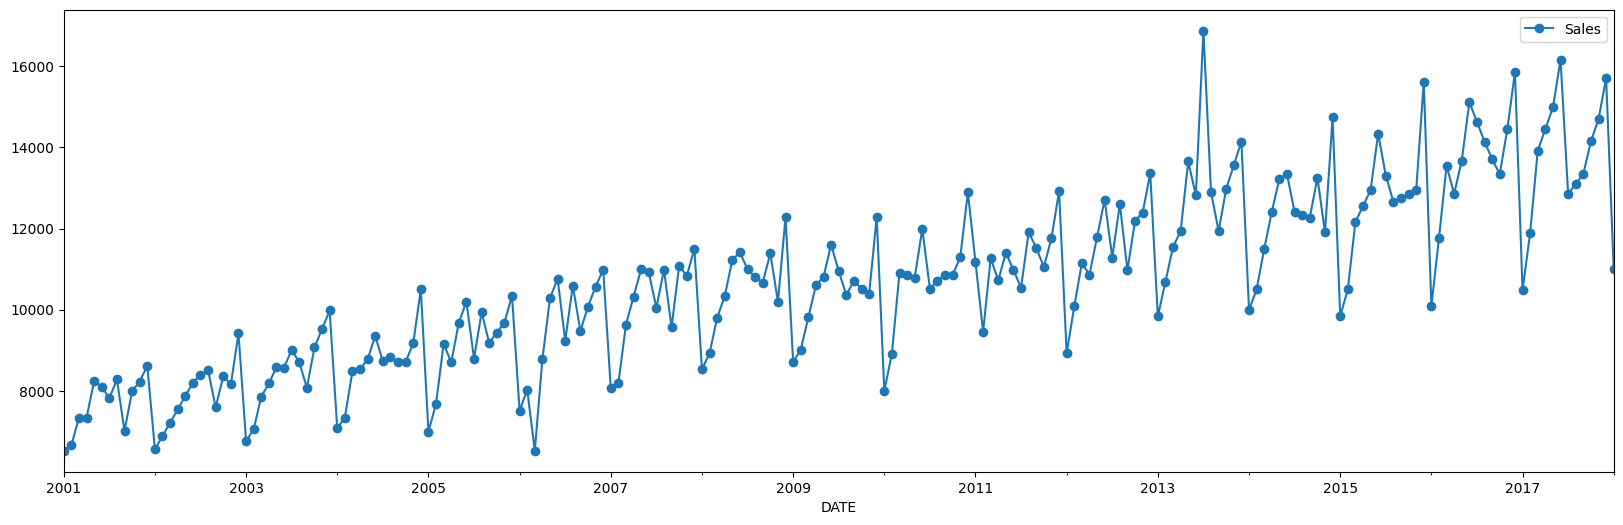

In [ ]:
train_x.plot(style="-o")

#### Simple Exponential Smoothening

In [ ]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales)
_ = model.fit(smoothing_level = 0.2)
_.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


DATE
2001-01-01     6522.120000
2001-02-01     6522.120000
2001-03-01     6548.496000
2001-04-01     6705.196800
2001-05-01     6830.557440
                  ...     
2018-09-01    14545.725040
2018-10-01    14404.180032
2018-11-01    14593.544025
2018-12-01    14797.835220
2019-01-01    15214.100176
Length: 217, dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


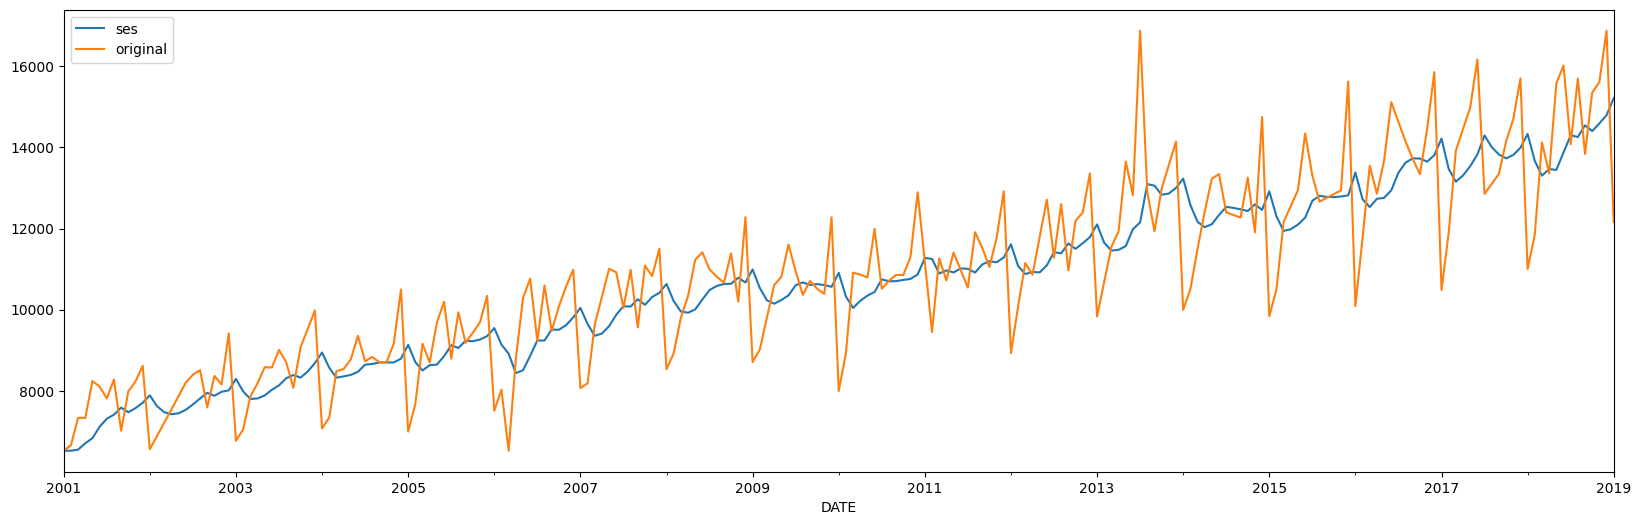

In [ ]:
pred = pd.Series(sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=0.2).fittedvalues)

pred.plot(label='ses')
mobile_sales.Sales.plot(label='original')

plt.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


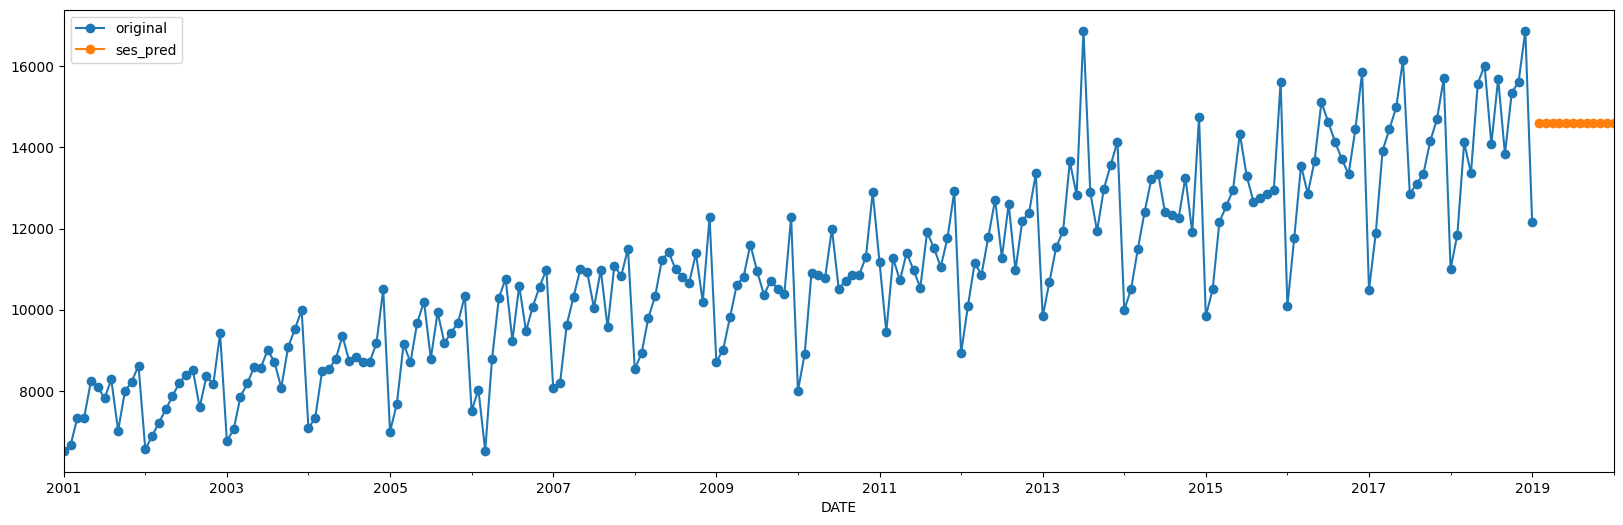

In [ ]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=0.2)
pred = model.forecast(12)

mobile_sales.Sales.plot(label='original', style='-o')
pred.plot(label='ses_pred', style='-o')
plt.legend()

#### Double Exponential Smoothening

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


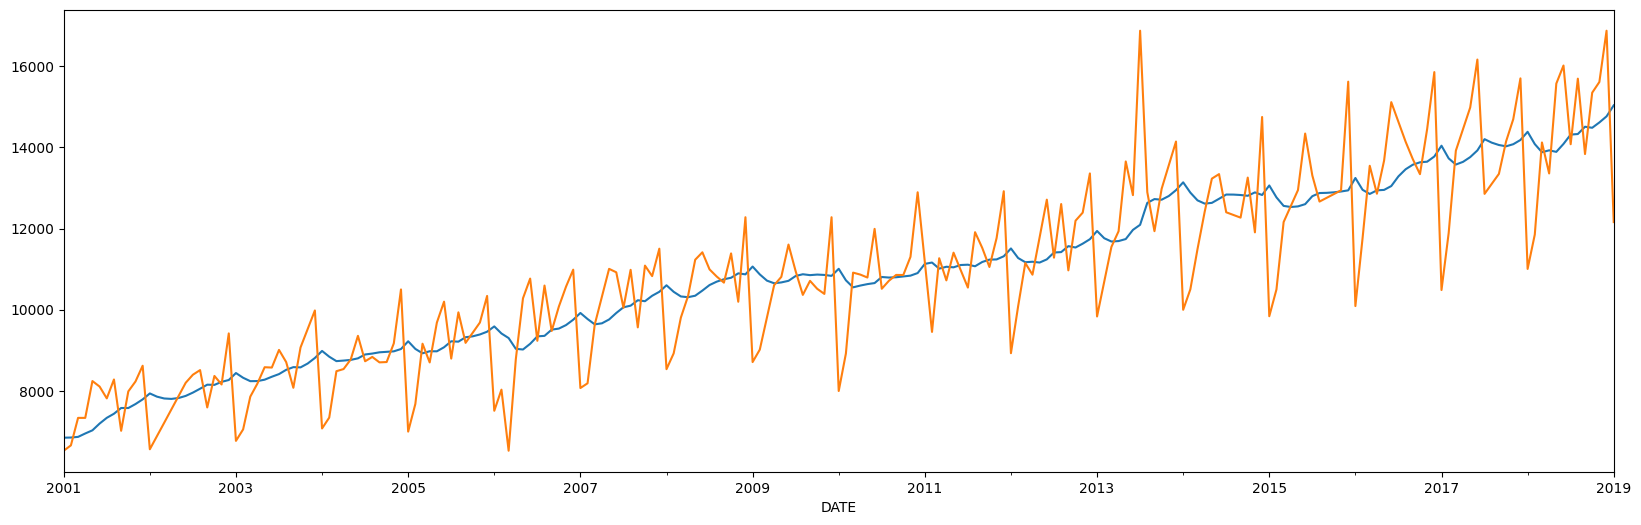

In [ ]:
model = sm.tsa.ExponentialSmoothing(mobile_sales['Sales'], trend="add").fit()
model.fittedvalues.plot(label="fitted")
mobile_sales.Sales.plot(label="actual")
plt.show()

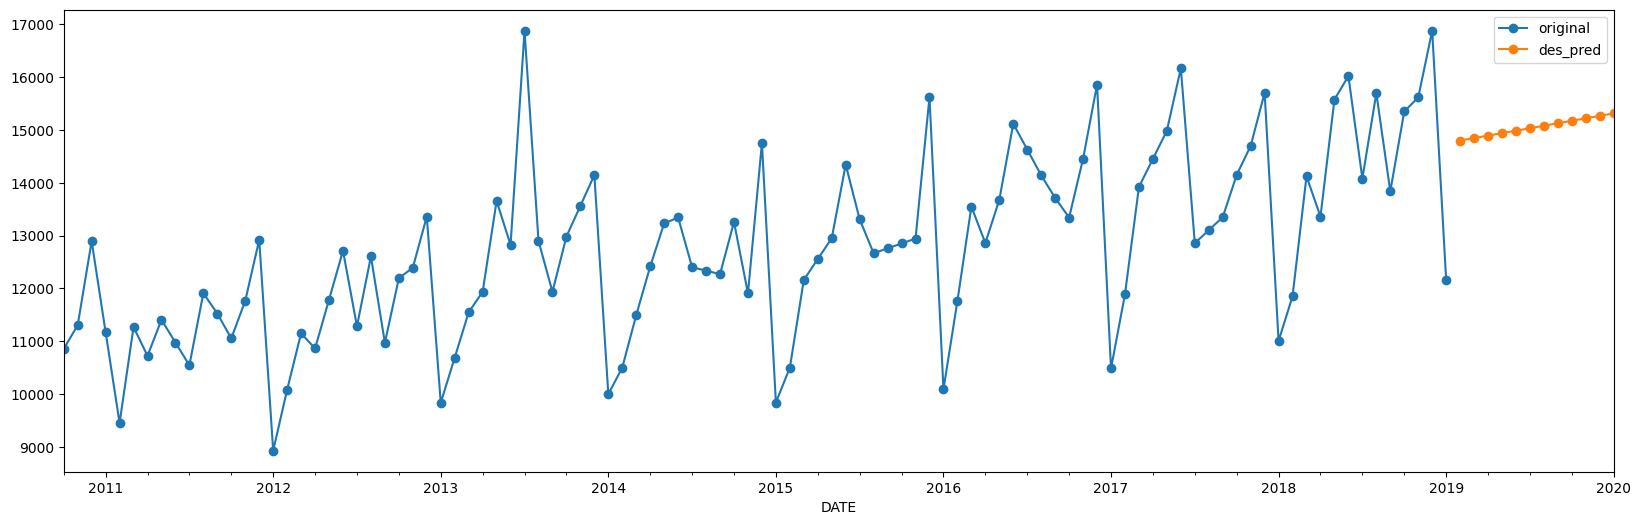

In [ ]:
pred = model.forecast(12)

mobile_sales.Sales.iloc[-100:].plot(label='original', style='-o')
pred.plot(label='des_pred', style='-o')
plt.legend()
plt.show()

In [ ]:
pred

2019-02-01    14799.655554
2019-03-01    14846.404253
2019-04-01    14893.152952
2019-05-01    14939.901651
2019-06-01    14986.650351
2019-07-01    15033.399050
2019-08-01    15080.147749
2019-09-01    15126.896448
2019-10-01    15173.645148
2019-11-01    15220.393847
2019-12-01    15267.142546
2020-01-01    15313.891246
Freq: MS, dtype: float64

In [ ]:
test_x['pred'] = pred.values

MAE : 1255.973
RMSE : 1547.056
MAPE: 0.093


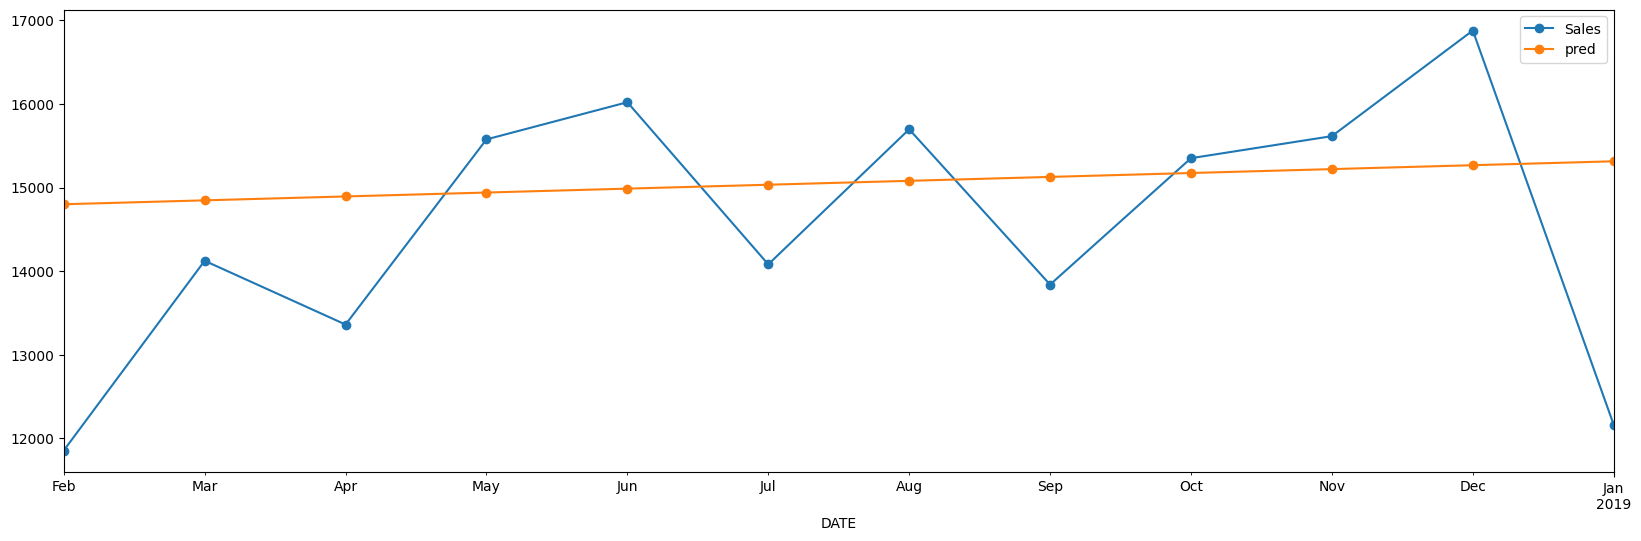

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])


#### Triple Exponential Smoothening

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


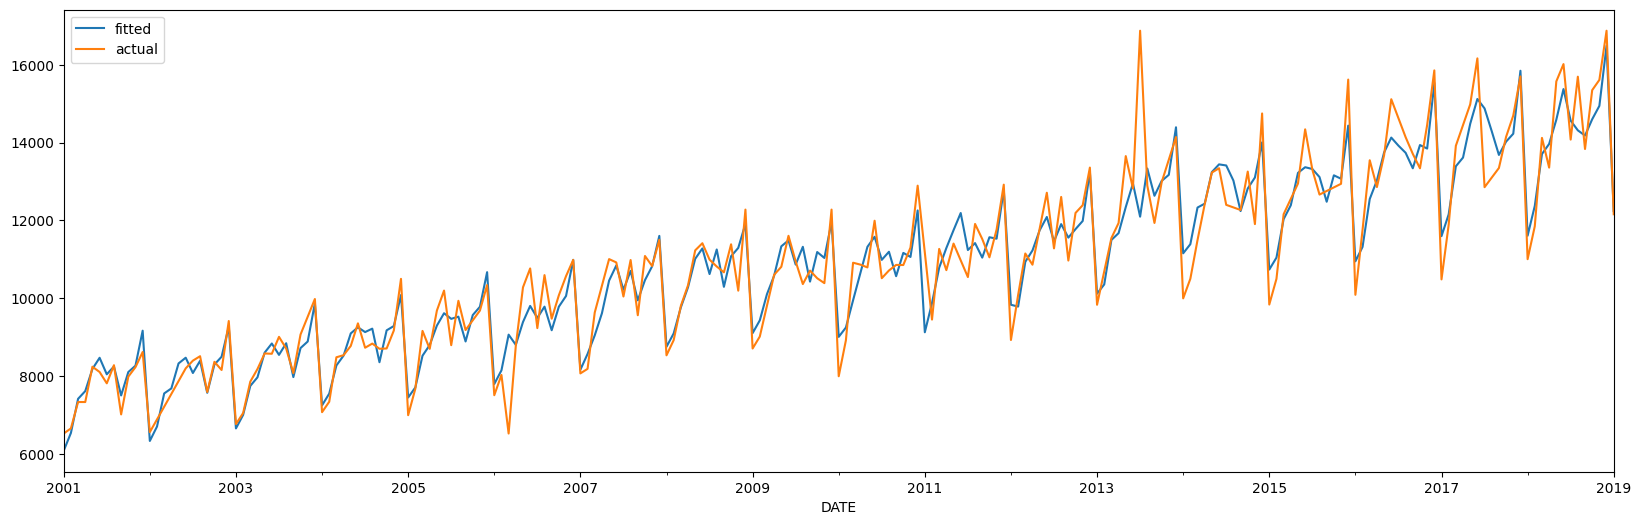

In [ ]:
model = sm.tsa.ExponentialSmoothing(mobile_sales['Sales'], trend="add", seasonal = "add").fit()
model.fittedvalues.plot(label="fitted")
mobile_sales.Sales.plot(label="actual")
plt.legend()
plt.show()

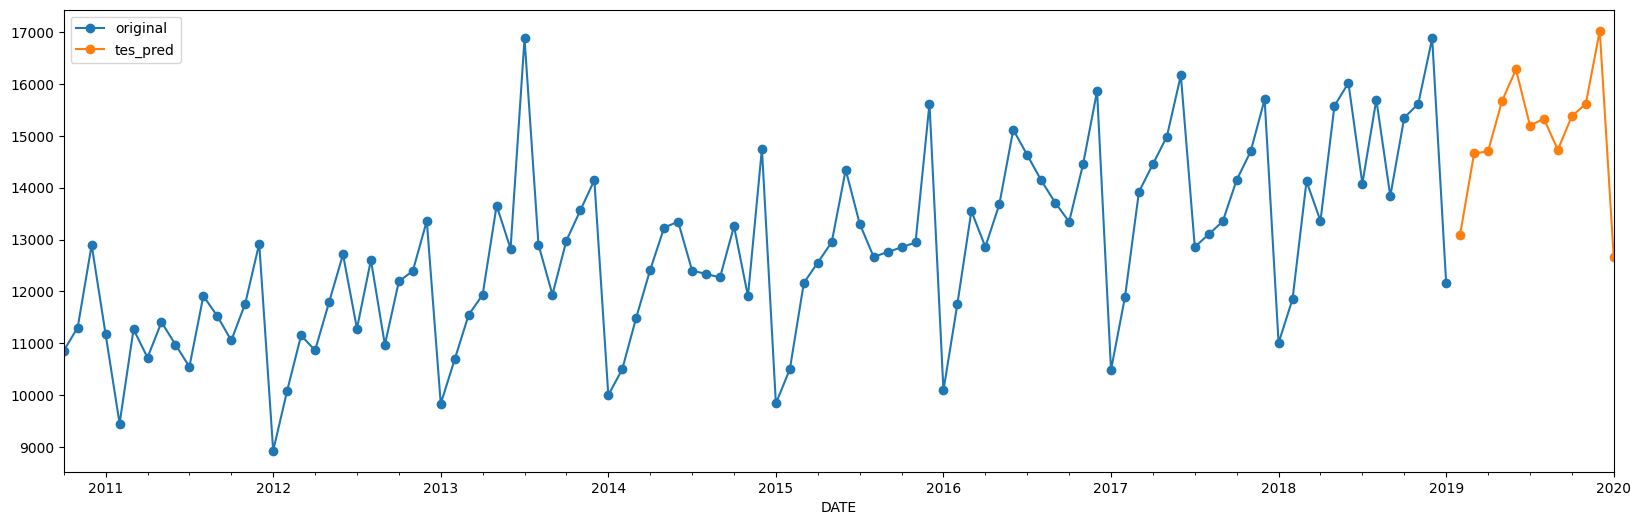

In [ ]:
pred = model.forecast(12)

mobile_sales.Sales.iloc[-100:].plot(label='original', style='-o')
pred.plot(label='tes_pred', style='-o')
plt.legend()
plt.show()

MAE : 544.902
RMSE : 717.096
MAPE: 0.04


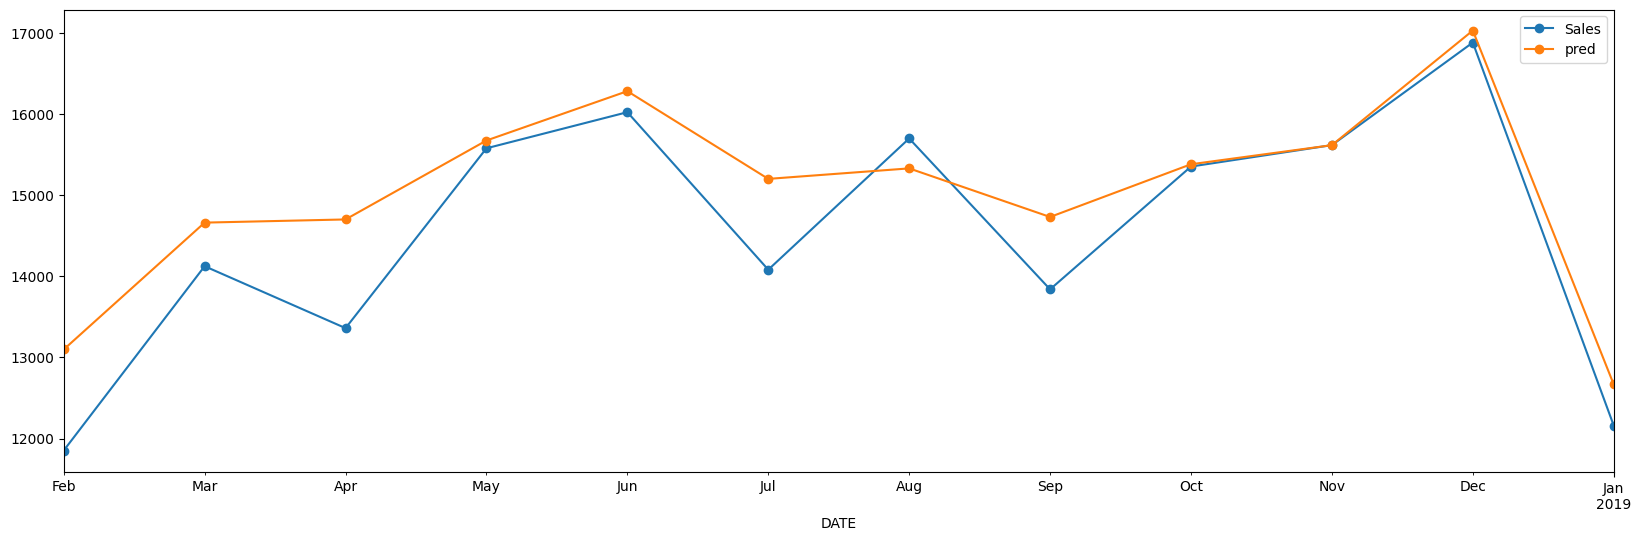

In [ ]:
test_x['pred'] = pred.values

test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])


## ARIMA Models

### Dickey Fuller Test

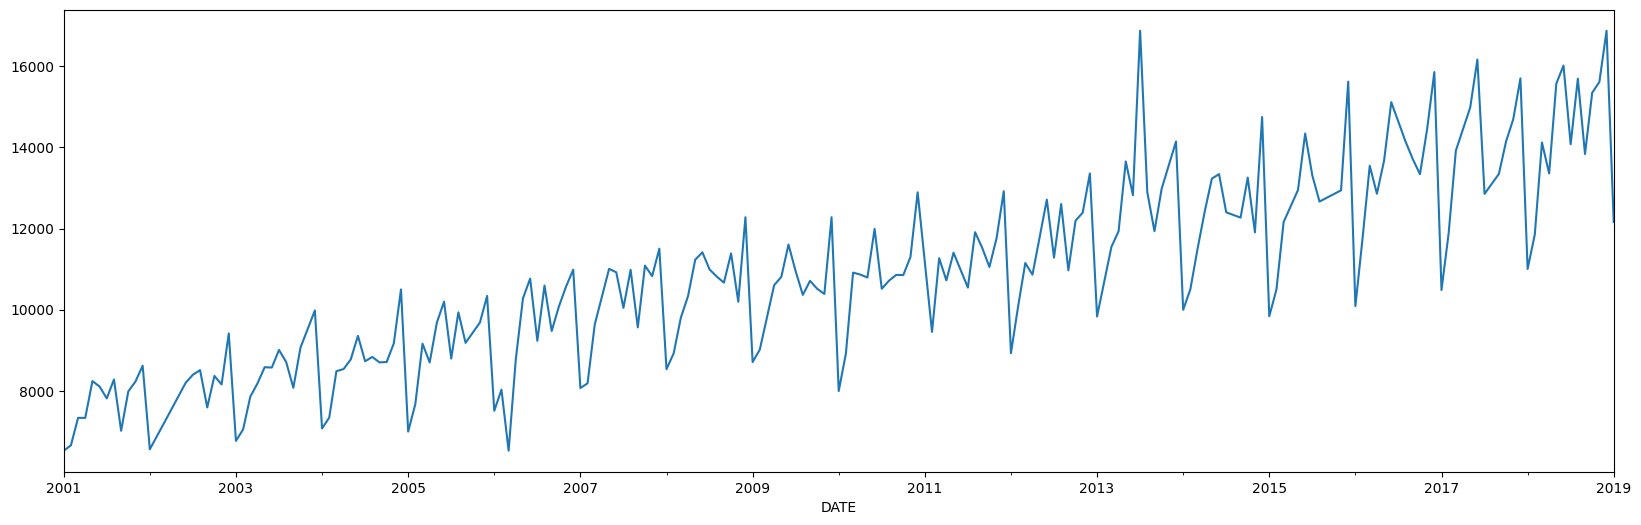

In [ ]:
mobile_sales.Sales.plot();

In [ ]:
sm.tsa.stattools.adfuller(mobile_sales.Sales)

(0.36164587230883044,
 0.9800025652360412,
 12,
 204,
 {'1%': -3.462818103072159,
  '5%': -2.8758145932936805,
  '10%': -2.574378674548251},
 3284.5245284243824)

In [ ]:
def adf_test(data, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1]

    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

In [ ]:
adf_test(mobile_sales.Sales)

Sequence is not stationary


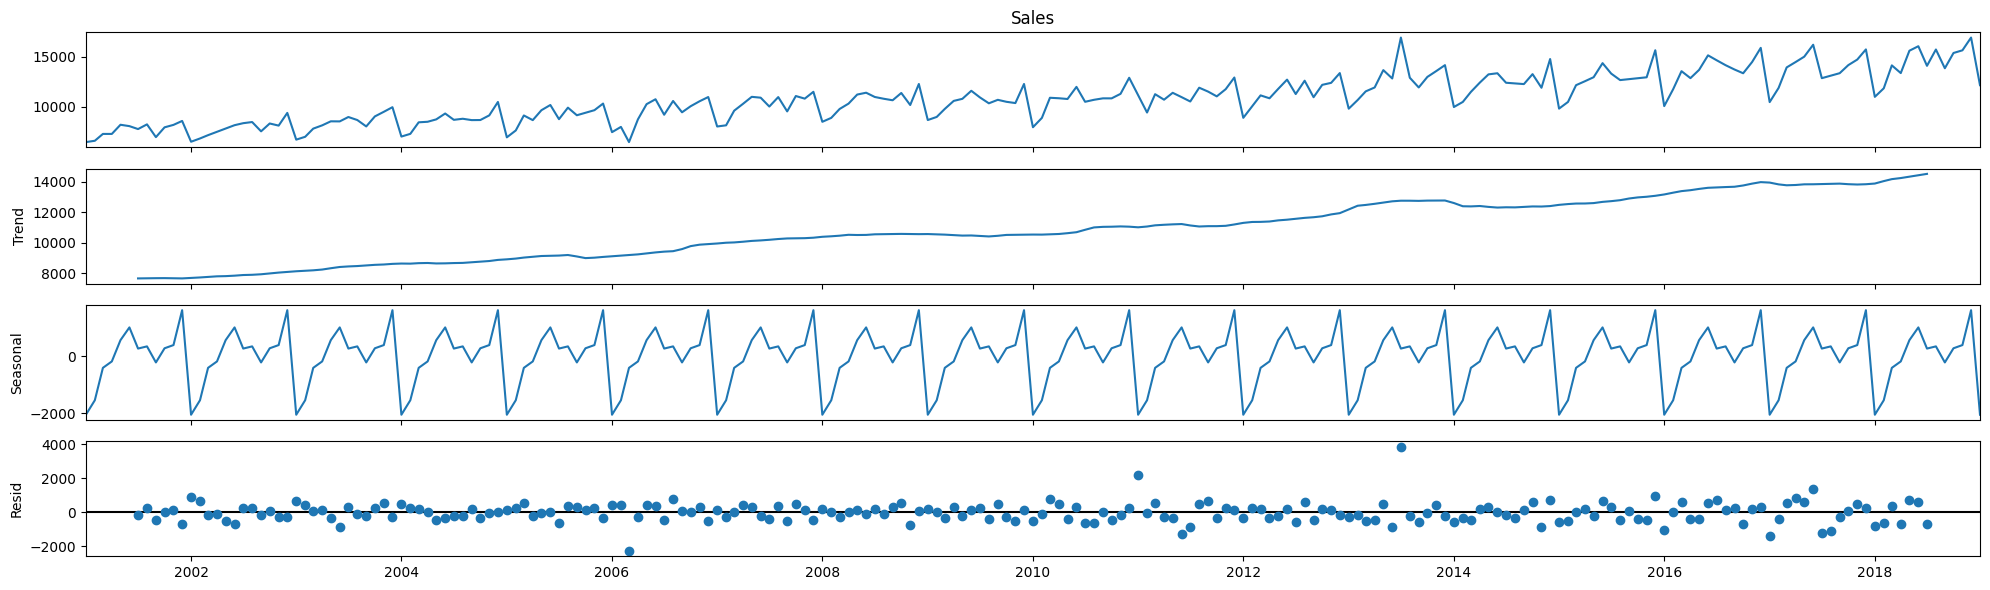

In [ ]:
model = sm.tsa.seasonal_decompose(mobile_sales['Sales'], model = 'additive')
model.plot();

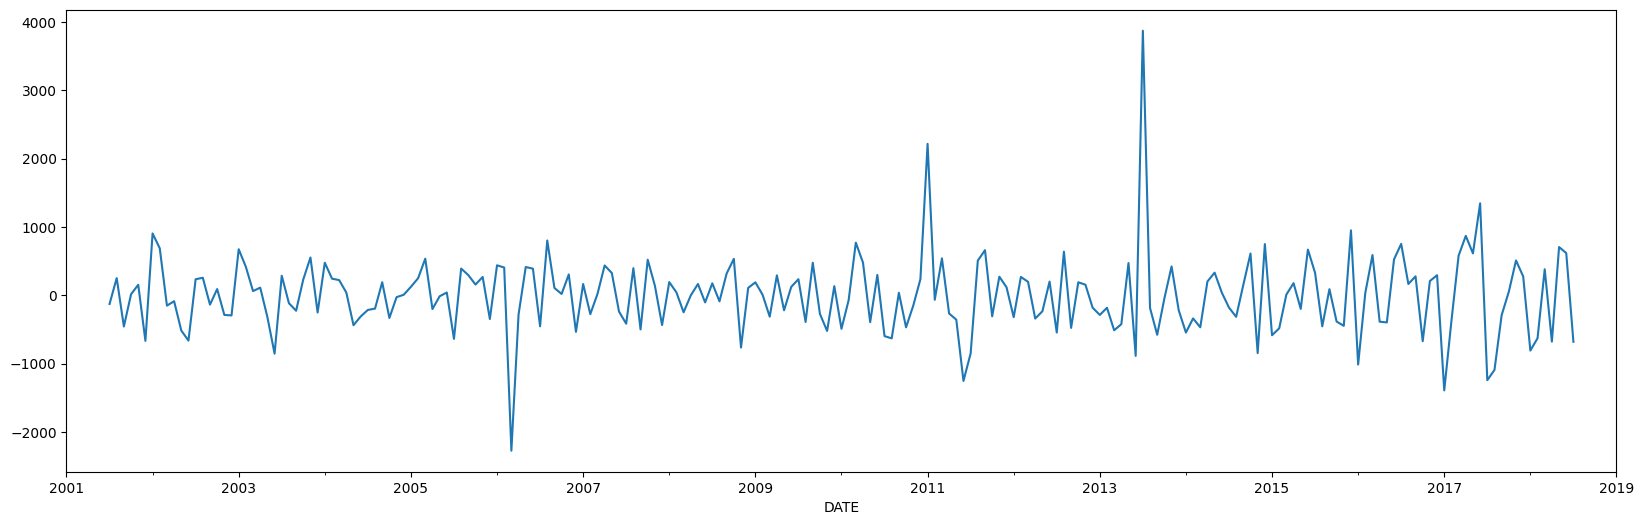

In [ ]:
model.resid.plot();

In [ ]:
adf_test(model.resid.dropna())

Sequence is stationary


<Axes: xlabel='DATE'>

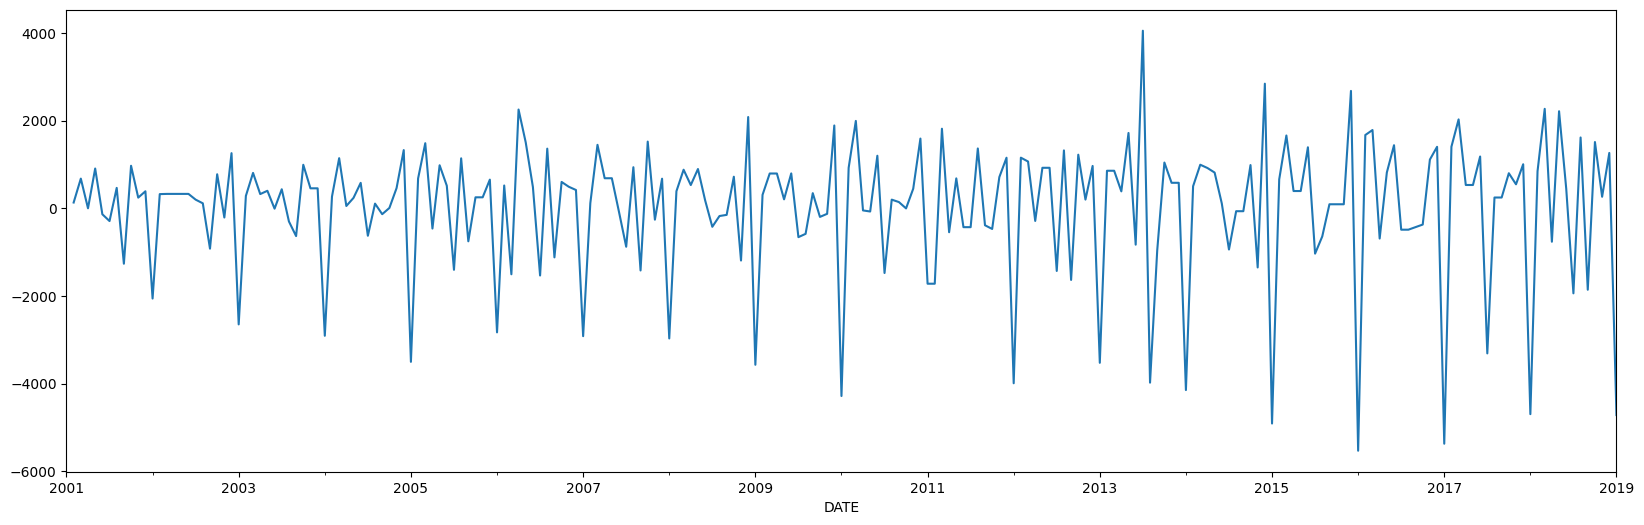

In [ ]:
mobile_sales.Sales.diff(1).plot()

In [ ]:
adf_test(mobile_sales.Sales.diff(1).dropna())

Sequence is stationary


### ACF/PACF

In [ ]:
mobile_sales.Sales.head()

DATE
2001-01-01    6522.12
2001-02-01    6654.00
2001-03-01    7332.00
2001-04-01    7332.00
2001-05-01    8240.00
Name: Sales, dtype: float64

In [ ]:
mobile_sales.Sales.shift(1).head()

DATE
2001-01-01        NaN
2001-02-01    6522.12
2001-03-01    6654.00
2001-04-01    7332.00
2001-05-01    7332.00
Name: Sales, dtype: float64

In [ ]:
lag = 1

np.corrcoef(mobile_sales.Sales[lag:], mobile_sales.Sales.shift(lag)[lag:])[0][1]

0.7924587051003289

In [ ]:
lag = 12

np.corrcoef(mobile_sales.Sales[lag:], mobile_sales.Sales.shift(lag)[lag:])[0][1]

0.9282432783605019

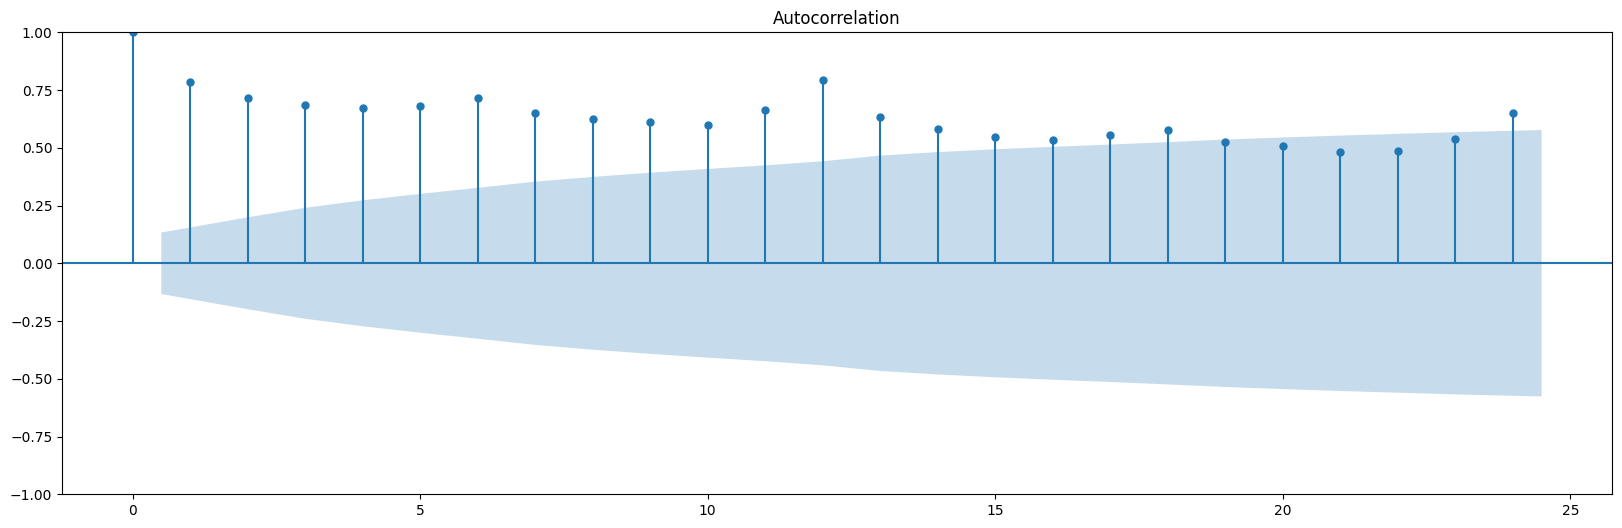

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(mobile_sales.Sales);

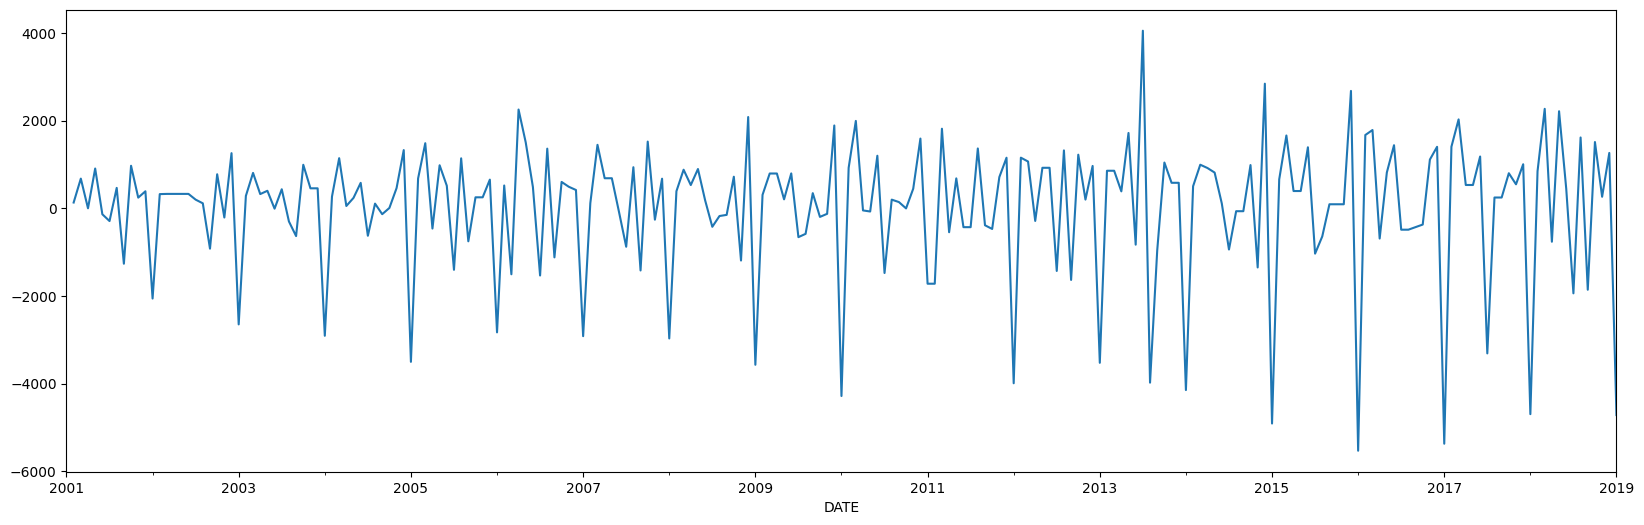

In [ ]:
mobile_sales.Sales.diff().plot();

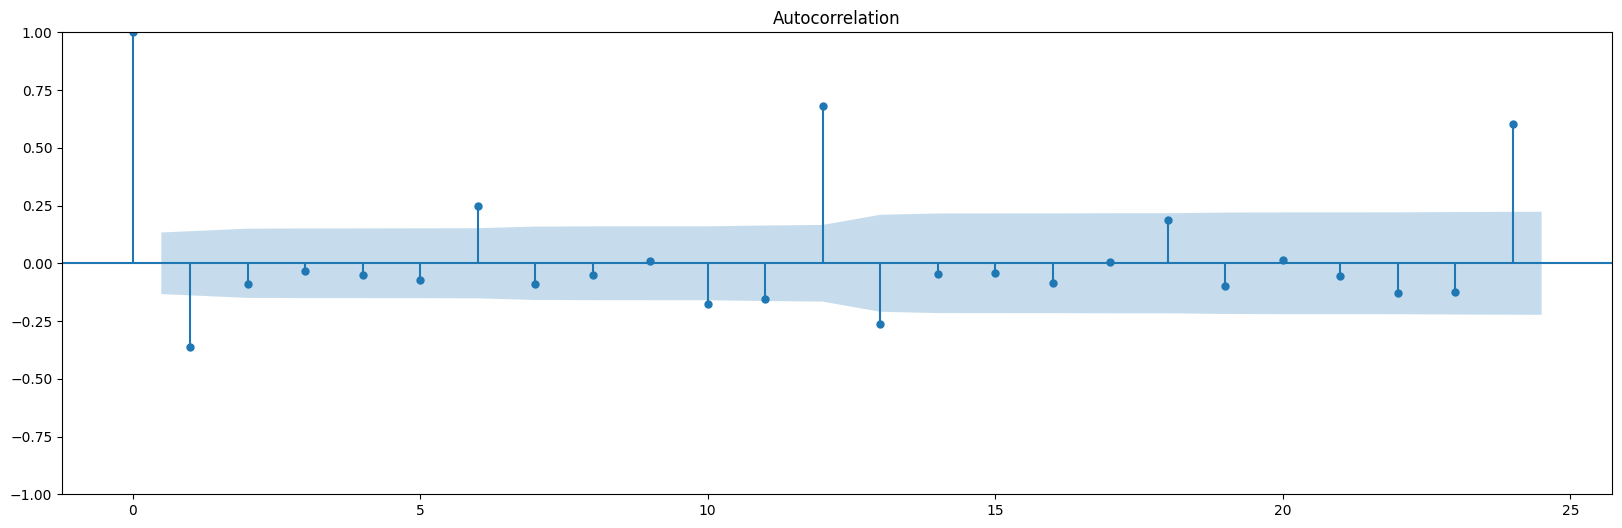

In [ ]:
plot_acf(mobile_sales.Sales.diff().dropna());

### Confidence Interval

### AR

### MA

### ARMA

### ARIMA

### SARIMA

### SARIMAX

## Facebook Prophet

https://www.kaggle.com/code/kmkarakaya/missing-data-and-time-series-prediction-by-prophet

# **Recommendation Systems**

## Market Basket Analysis -Apriori

https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!gdown 1M5IPR96R9efi5cb2n8LxpXIXyx_F0x3v

Downloading...
From: https://drive.google.com/uc?id=1M5IPR96R9efi5cb2n8LxpXIXyx_F0x3v
To: /content/Online_Retail.csv
100% 45.0M/45.0M [00:00<00:00, 206MB/s]


In [ ]:
df = pd.read_csv("Online_Retail.csv")
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

     InvoiceDate  UnitPrice  CustomerID         Country  
0  01/12/10 8:26       2.55     17850.0  United Kingdom  
1  01/12/10 8:26       3.39     17850.0  United Kingdom  
2  01/12/10 8:26       2.75     17850.0  United Kingdom  
3  01/12/10 8:26       3.39     17850.0  United Kingdom  
4  01/12/10 8:26       3.39     17850.0  United Kingdom

In [ ]:
df.shape

(541909, 8)

In [ ]:
print('Number of Unique Invoice numbers: {cnt}'.format(cnt=df.InvoiceNo.nunique()))
print('Number of Unique Customer IDs: {cnt}'.format(cnt=df.CustomerID.nunique()))

Number of Unique Invoice numbers: 25900
Number of Unique Customer IDs: 4372


In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [ ]:
df = df[df['Quantity']>=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [ ]:
df.dropna(axis=0, subset=['InvoiceNo'],inplace=True)
df['InvoiceNo']=df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
df.shape

(531285, 8)

In [ ]:
print('Number of Unique Invoice numbers: {cnt}'.format(cnt=df.InvoiceNo.nunique()))

Number of Unique Invoice numbers: 20728


In [ ]:
df['Country'].value_counts()

United Kingdom          486286
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [ ]:
data = (df[df['Country'] =="United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity']
               .sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
data.head(5)

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                  0.0                             0.0   
536366                                  0.0                             0.0   
536367                                  0.0                             0.0   
536368                                  0.0                             0.0   
536369                                  0.0                             0.0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                      0.0                           0.0   
536366                      0.0                           0.0   
536367                      0.0                           0.0   
536368                      0.0                           0.0   
536369                      0.0                           0.0   

Description   NINE DRAWER OFFICE TIDY   OVAL WALL MIRROR DIAMANTE   \
InvoiceNo                                                            
536365                            0.0                          0.0   
536366                            0.0                          0.0   
536367                            0.0                          0.0   
536368                            0.0                          0.0   
536369                            0.0                          0.0   

Description   RED SPOT GIFT BAG LARGE   SET 2 TEA TOWELS I LOVE LONDON   \
InvoiceNo                                                                 
536365                            0.0                               0.0   
536366                            0.0                               0.0   
536367                            0.0                               0.0   
536368                            0.0                               0.0   
536369                            0.0                               0.0   

Description   SPACEBOY BABY GIFT SET   TOADSTOOL BEDSIDE LIGHT   ...  \
InvoiceNo                                                        ...   
536365                           0.0                        0.0  ...   
536366                           0.0                        0.0  ...   
536367                           0.0                        0.0  ...   
536368                           0.0                        0.0  ...   
536369                           0.0                        0.0  ...   

Description  returned  taig adjust  test  to push order througha s stock was   \
InvoiceNo                                                                       
536365            0.0          0.0   0.0                                  0.0   
536366            0.0          0.0   0.0                                  0.0   
536367            0.0          0.0   0.0                                  0.0   
536368            0.0          0.0   0.0                                  0.0   
536369            0.0          0.0   0.0                                  0.0   

Description  website fixed  wrongly coded 20713  wrongly coded 23343  \
InvoiceNo                                                              
536365                 0.0                  0.0                  0.0   
536366                 0.0                  0.0                  0.0   
536367                 0.0                  0.0                  0.0   
536368                 0.0                  0.0                  0.0   
536369                 0.0                  0.0                  0.0   

Description  wrongly marked  wrongly marked 23343  \
InvoiceNo                                           
536365                  0.0                   0.0   
536366                  0.0                   0.0   
536367                  0.0                   0.0   
536368                  0.0                   0.0   
536369                  0.0                   0.0   

Description  wrongly so

In [ ]:
data = (data > 0).astype(int)
data.head()

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536369                        0                             0   

Description   NINE DRAWER OFFICE TIDY   OVAL WALL MIRROR DIAMANTE   \
InvoiceNo                                                            
536365                              0                            0   
536366                              0                            0   
536367                              0                            0   
536368                              0                            0   
536369                              0                            0   

Description   RED SPOT GIFT BAG LARGE   SET 2 TEA TOWELS I LOVE LONDON   \
InvoiceNo                                                                 
536365                              0                                 0   
536366                              0                                 0   
536367                              0                                 0   
536368                              0                                 0   
536369                              0                                 0   

Description   SPACEBOY BABY GIFT SET   TOADSTOOL BEDSIDE LIGHT   ...  \
InvoiceNo                                                        ...   
536365                             0                          0  ...   
536366                             0                          0  ...   
536367                             0                          0  ...   
536368                             0                          0  ...   
536369                             0                          0  ...   

Description  returned  taig adjust  test  to push order througha s stock was   \
InvoiceNo                                                                       
536365              0            0     0                                    0   
536366              0            0     0                                    0   
536367              0            0     0                                    0   
536368              0            0     0                                    0   
536369              0            0     0                                    0   

Description  website fixed  wrongly coded 20713  wrongly coded 23343  \
InvoiceNo                                                              
536365                   0                    0                    0   
536366                   0                    0                    0   
536367                   0                    0                    0   
536368                   0                    0                    0   
536369                   0                    0                    0   

Description  wrongly marked  wrongly marked 23343  \
InvoiceNo                                           
536365                    0                     0   
536366                    0                     0   
536367                    0                     0   
536368                    0                     0   
536369                    0                     0   

Description  wrongly so

In [ ]:
data = data[(data > 0).sum(axis=1) >= 2]
data.head()


Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536372                                    0                               0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536372                        0                             0   

Description   NINE DRAWER OFFICE TIDY   OVAL WALL MIRROR DIAMANTE   \
InvoiceNo                                                            
536365                              0                            0   
536366                              0                            0   
536367                              0                            0   
536368                              0                            0   
536372                              0                            0   

Description   RED SPOT GIFT BAG LARGE   SET 2 TEA TOWELS I LOVE LONDON   \
InvoiceNo                                                                 
536365                              0                                 0   
536366                              0                                 0   
536367                              0                                 0   
536368                              0                                 0   
536372                              0                                 0   

Description   SPACEBOY BABY GIFT SET   TOADSTOOL BEDSIDE LIGHT   ...  \
InvoiceNo                                                        ...   
536365                             0                          0  ...   
536366                             0                          0  ...   
536367                             0                          0  ...   
536368                             0                          0  ...   
536372                             0                          0  ...   

Description  returned  taig adjust  test  to push order througha s stock was   \
InvoiceNo                                                                       
536365              0            0     0                                    0   
536366              0            0     0                                    0   
536367              0            0     0                                    0   
536368              0            0     0                                    0   
536372              0            0     0                                    0   

Description  website fixed  wrongly coded 20713  wrongly coded 23343  \
InvoiceNo                                                              
536365                   0                    0                    0   
536366                   0                    0                    0   
536367                   0                    0                    0   
536368                   0                    0                    0   
536372                   0                    0                    0   

Description  wrongly marked  wrongly marked 23343  \
InvoiceNo                                           
536365                    0                     0   
536366                    0                     0   
536367                    0                     0   
536368                    0                     0   
536372                    0                     0   

Description  wrongly so

In [ ]:
data.shape

(16539, 4058)

In [ ]:
from mlxtend.frequent_patterns import apriori

In [ ]:
frequent_itemsets_plus = apriori(data, min_support=0.03,
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frequent_itemsets_plus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support                                           itemsets
0    0.129875               (WHITE HANGING HEART T-LIGHT HOLDER)
1    0.116331                          (JUMBO BAG RED RETROSPOT)
2    0.100671                         (REGENCY CAKESTAND 3 TIER)
3    0.095471                                    (PARTY BUNTING)
4    0.084165                          (LUNCH BAG RED RETROSPOT)
..        ...                                                ...
172  0.030473                   (CHRISTMAS CRAFT LITTLE FRIENDS)
173  0.030473                          (CREAM HEART CARD HOLDER)
174  0.030413     (LUNCH BAG CARS BLUE, LUNCH BAG  BLACK SKULL.)
175  0.030292  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
176  0.030171  (LUNCH BAG  BLACK SKULL., LUNCH BAG SUKI DESIGN )

[177 rows x 2 columns]

In [ ]:
frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

frequent_itemsets_plus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support                                           itemsets  length
0    0.129875               (WHITE HANGING HEART T-LIGHT HOLDER)       1
1    0.116331                          (JUMBO BAG RED RETROSPOT)       1
2    0.100671                         (REGENCY CAKESTAND 3 TIER)       1
3    0.095471                                    (PARTY BUNTING)       1
4    0.084165                          (LUNCH BAG RED RETROSPOT)       1
..        ...                                                ...     ...
172  0.030473                   (CHRISTMAS CRAFT LITTLE FRIENDS)       1
173  0.030473                          (CREAM HEART CARD HOLDER)       1
174  0.030413     (LUNCH BAG CARS BLUE, LUNCH BAG  BLACK SKULL.)       2
175  0.030292  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...       2
176  0.030171  (LUNCH BAG  BLACK SKULL., LUNCH BAG SUKI DESIGN )       2

[177 rows x 3 columns]

In [ ]:
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
association_rules = association_rules(frequent_itemsets_plus, metric='lift',
                  min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

association_rules.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                           consequents  \
0     (PINK REGENCY TEACUP AND SAUCER)     (GREEN REGENCY TEACUP AND SAUCER)   
1    (GREEN REGENCY TEACUP AND SAUCER)      (PINK REGENCY TEACUP AND SAUCER)   
2     (PINK REGENCY TEACUP AND SAUCER)    (ROSES REGENCY TEACUP AND SAUCER )   
3   (ROSES REGENCY TEACUP AND SAUCER )      (PINK REGENCY TEACUP AND SAUCER)   
4  (GARDENERS KNEELING PAD KEEP CALM )  (GARDENERS KNEELING PAD CUP OF TEA )   

   antecedent support  consequent support   support  confidence       lift  \
0            0.042264            0.056473  0.034887    0.825465  14.617093   
1            0.056473            0.042264  0.034887    0.617773  14.617093   
2            0.042264            0.057682  0.033013    0.781116  13.541798   
3            0.057682            0.042264  0.033013    0.572327  13.541798   
4            0.054235            0.045287  0.032711    0.603122  13.317793   

   leverage  conviction  zhangs_metric  
0  0.032500    5.405948       0.972697  
1  0.032500    2.505674       0.987345  
2  0.030575    4.305101       0.967025  
3  0.030575    2.239413       0.982847  
4  0.030254    2.405555       0.977952

In [ ]:
association_rules[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                           consequents  \
0      (PINK REGENCY TEACUP AND SAUCER)     (GREEN REGENCY TEACUP AND SAUCER)   
1     (GREEN REGENCY TEACUP AND SAUCER)      (PINK REGENCY TEACUP AND SAUCER)   
2      (PINK REGENCY TEACUP AND SAUCER)    (ROSES REGENCY TEACUP AND SAUCER )   
3    (ROSES REGENCY TEACUP AND SAUCER )      (PINK REGENCY TEACUP AND SAUCER)   
4   (GARDENERS KNEELING PAD KEEP CALM )  (GARDENERS KNEELING PAD CUP OF TEA )   
5  (GARDENERS KNEELING PAD CUP OF TEA )   (GARDENERS KNEELING PAD KEEP CALM )   
6     (GREEN REGENCY TEACUP AND SAUCER)    (ROSES REGENCY TEACUP AND SAUCER )   
7    (ROSES REGENCY TEACUP AND SAUCER )     (GREEN REGENCY TEACUP AND SAUCER)   
8          (ALARM CLOCK BAKELIKE GREEN)           (ALARM CLOCK BAKELIKE RED )   
9           (ALARM CLOCK BAKELIKE RED )          (ALARM CLOCK BAKELIKE GREEN)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.042264            0.056473  0.034887    0.825465  14.617093   
1            0.056473            0.042264  0.034887    0.617773  14.617093   
2            0.042264            0.057682  0.033013    0.781116  13.541798   
3            0.057682            0.042264  0.033013    0.572327  13.541798   
4            0.054235            0.045287  0.032711    0.603122  13.317793   
5            0.045287            0.054235  0.032711    0.722296  13.317793   
6            0.056473            0.057682  0.042385    0.750535  13.011639   
7            0.057682            0.056473  0.042385    0.734801  13.011639   
8            0.052663            0.056170  0.034041    0.646383  11.507574   
9            0.056170            0.052663  0.034041    0.606028  11.507574   

   leverage  conviction  zhangs_metric  
0  0.032500    5.405948       0.972697  
1  0.032500    2.505674       0.987345  
2  0.030575    4.305101       0.967025  
3  0.030575    2.239413       0.982847  
4  0.030254    2.405555       0.977952  
5  0.030254    3.405662       0.968786  
6  0.039127    3.777361       0.978398  
7  0.039127    3.557807       0.979654  
8  0.031083    2.669077       0.963861  
9  0.031083    2.404578       0.967442